In [93]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf

In [94]:
%precision 4
pd.options.display.float_format = '{:.4f}'.format
%config InlineBackend.figure_format = 'retina'

In [95]:
data = yf.download(tickers = 'SPY')
data.head(-1)

[*********************100%%**********************]  1 of 1 completed


Open     High      Low    Close  Adj Close    Volume
Date                                                               
1993-01-29  43.9688  43.9688  43.7500  43.9375    24.7637   1003200
1993-02-01  43.9688  44.2500  43.9688  44.2500    24.9399    480500
1993-02-02  44.2188  44.3750  44.1250  44.3438    24.9927    201300
1993-02-03  44.4062  44.8438  44.3750  44.8125    25.2569    529400
1993-02-04  44.9688  45.0938  44.4688  45.0000    25.3626    531500
...             ...      ...      ...      ...        ...       ...
2024-06-07 533.6600 536.8900 532.5400 534.0100   534.0100  43224500
2024-06-10 533.1800 535.9900 532.5700 535.6600   535.6600  35729300
2024-06-11 534.0700 537.0100 532.0500 536.9500   536.9500  36383400
2024-06-12 541.6300 544.1200 540.3000 541.3600   541.3600  63251300
2024-06-13 543.1500 543.3300 539.5900 542.4500   542.4500  44760900

[7900 rows x 6 columns]

# Introduction

The purpose of this project is to evaluate the best investment strategy and subsequently recommend the best one, according to us. The strategies that are considered in this project are:

1. Buy-and-hold the SPY exchange-traded fund (ETF)
2. Hold SPY intraday only (i.e., buy at open and sell at close)
3. Hold SPY overnight only (i.e., buy at close and sell at open)
4. Buy-and-hold SPY except for worst n days and best n days each year, where n =1,2,3

The project focuses on maximizing returns from a $10,000 investment in the SPY ETF, which tracks the S&P 500 Index. It examines four investment horizons: 30 days, 1 year, 10 years, and the ETF's entire lifespan. The study aims to identify the strategy that offers the highest return, considering the impact of capital gains tax from the brokerage account used for the investment. By calculating and comparing cumulative returns across different timeframes, the project seeks to provide a comprehensive analysis of short-term and long-term investment strategies to determine the most effective approach for investing in the SPY ETF.

## 30 Day Returns

#### Buy and Hold Strategy

In [96]:
Horizon_30 = data.iloc[-32:]
Returnsbh_30 = (Horizon_30['Adj Close'].pct_change())

In [97]:
cumreturnBH_30 = np.exp(np.log1p(Returnsbh_30).cumsum()).mul(10000)

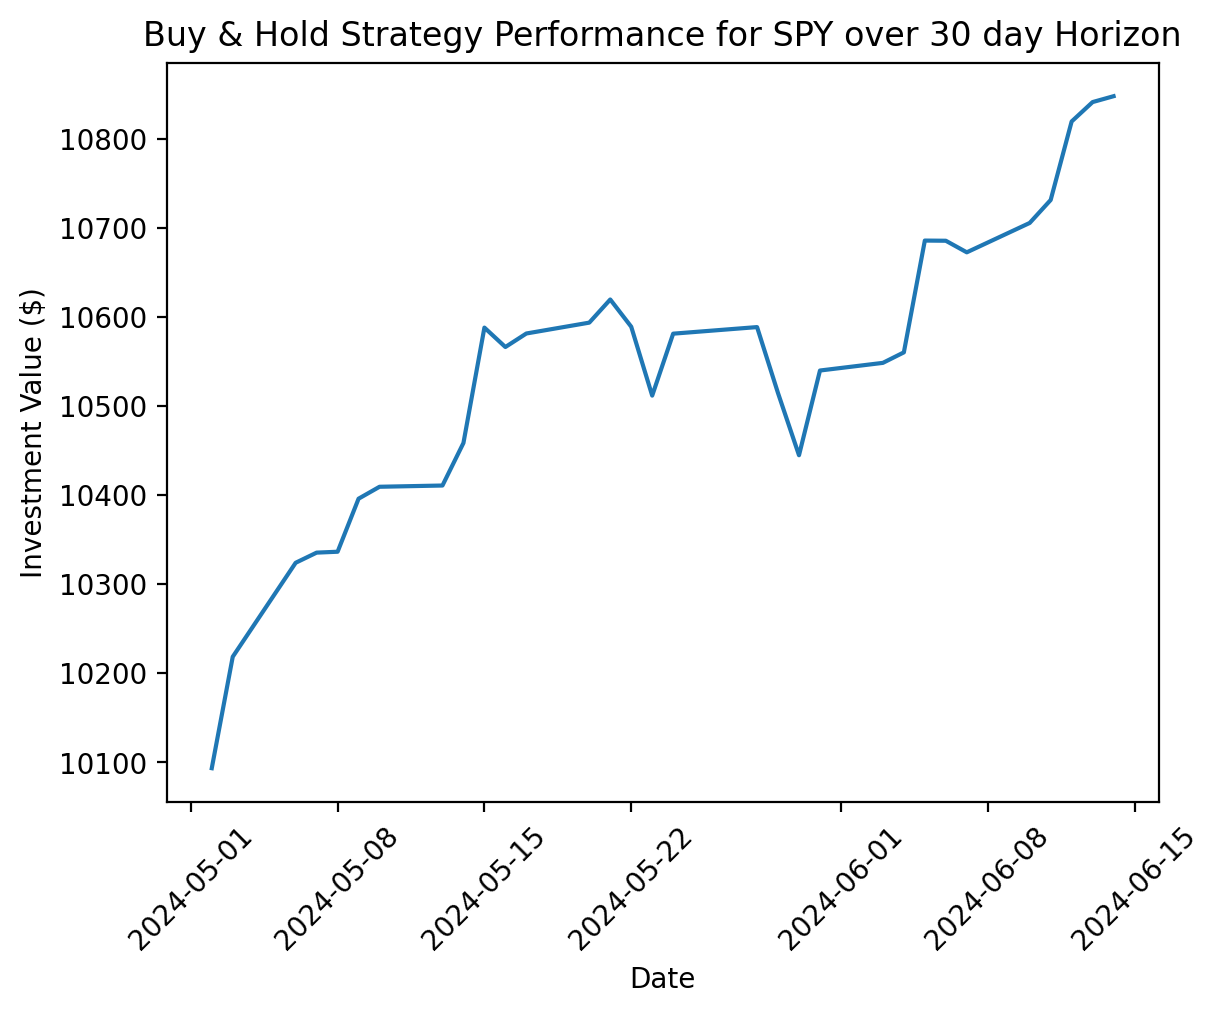

In [98]:
plt.plot(cumreturnBH_30)
plt.xticks(rotation=45)
plt.title('Buy & Hold Strategy Performance for SPY over 30 day Horizon')
plt.xlabel('Date')
plt.ylabel('Investment Value ($)')
plt.show() 

#### Intraday Strategy

In [99]:
ReturnsID_30 = (Horizon_30['Close'] - Horizon_30['Open'])/Horizon_30['Open']

In [100]:
cumreturnID_30 = np.exp(np.log1p(ReturnsID_30).cumsum()).mul(10000)

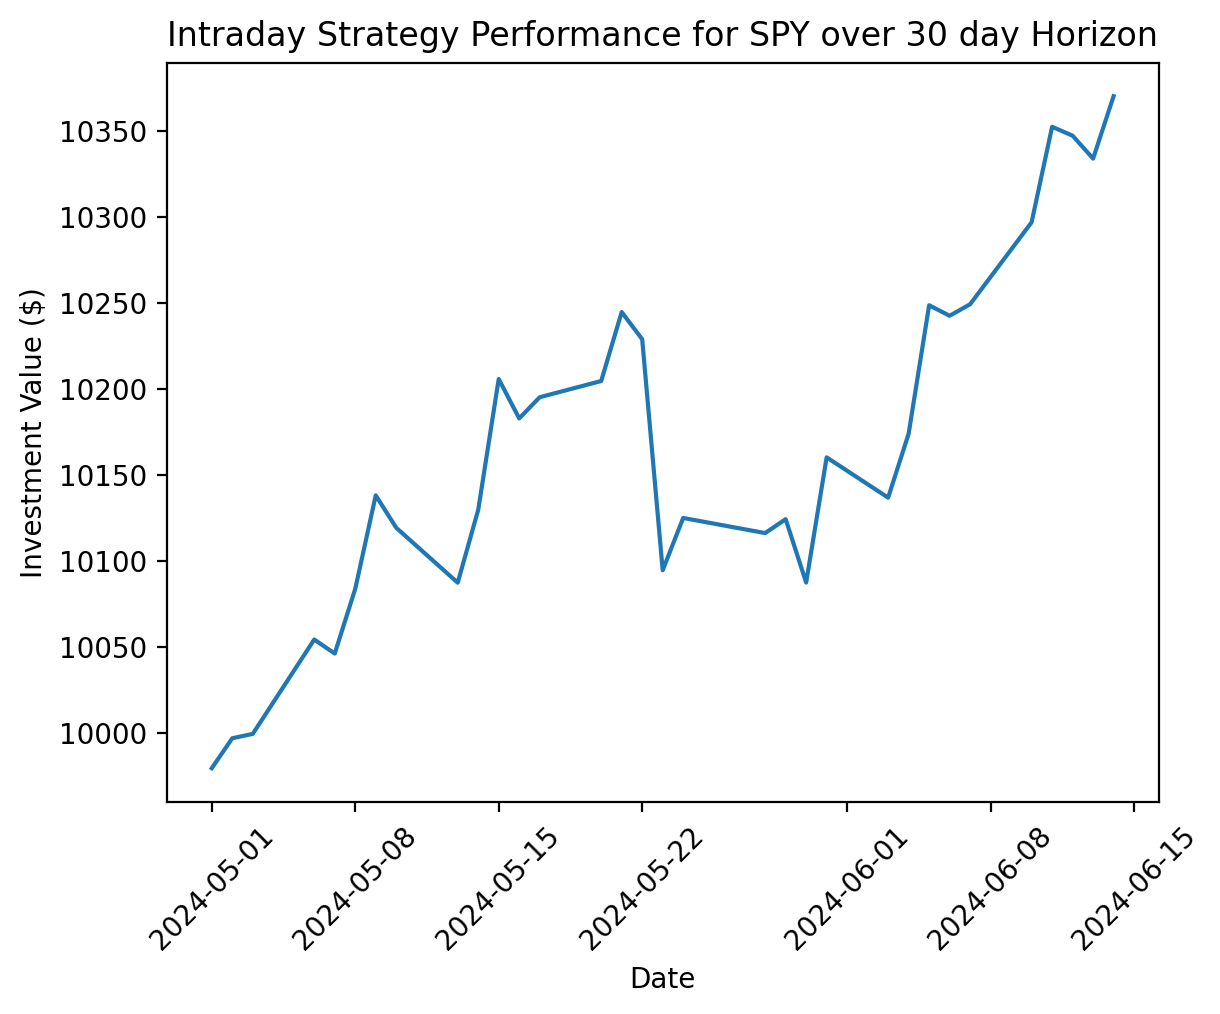

In [101]:
plt.plot(cumreturnID_30)
plt.xticks(rotation=45)
plt.title('Intraday Strategy Performance for SPY over 30 day Horizon')
plt.xlabel('Date')
plt.ylabel('Investment Value ($)')
plt.show() 
plt.show()

#### Overnight Strategy

In [102]:
ReturnsON_30 = (1+Returnsbh_30)/(1+ReturnsID_30) - 1

In [103]:
cumreturnON_30 = np.exp(np.log1p(ReturnsON_30[:-1]).cumsum()).mul(10000)

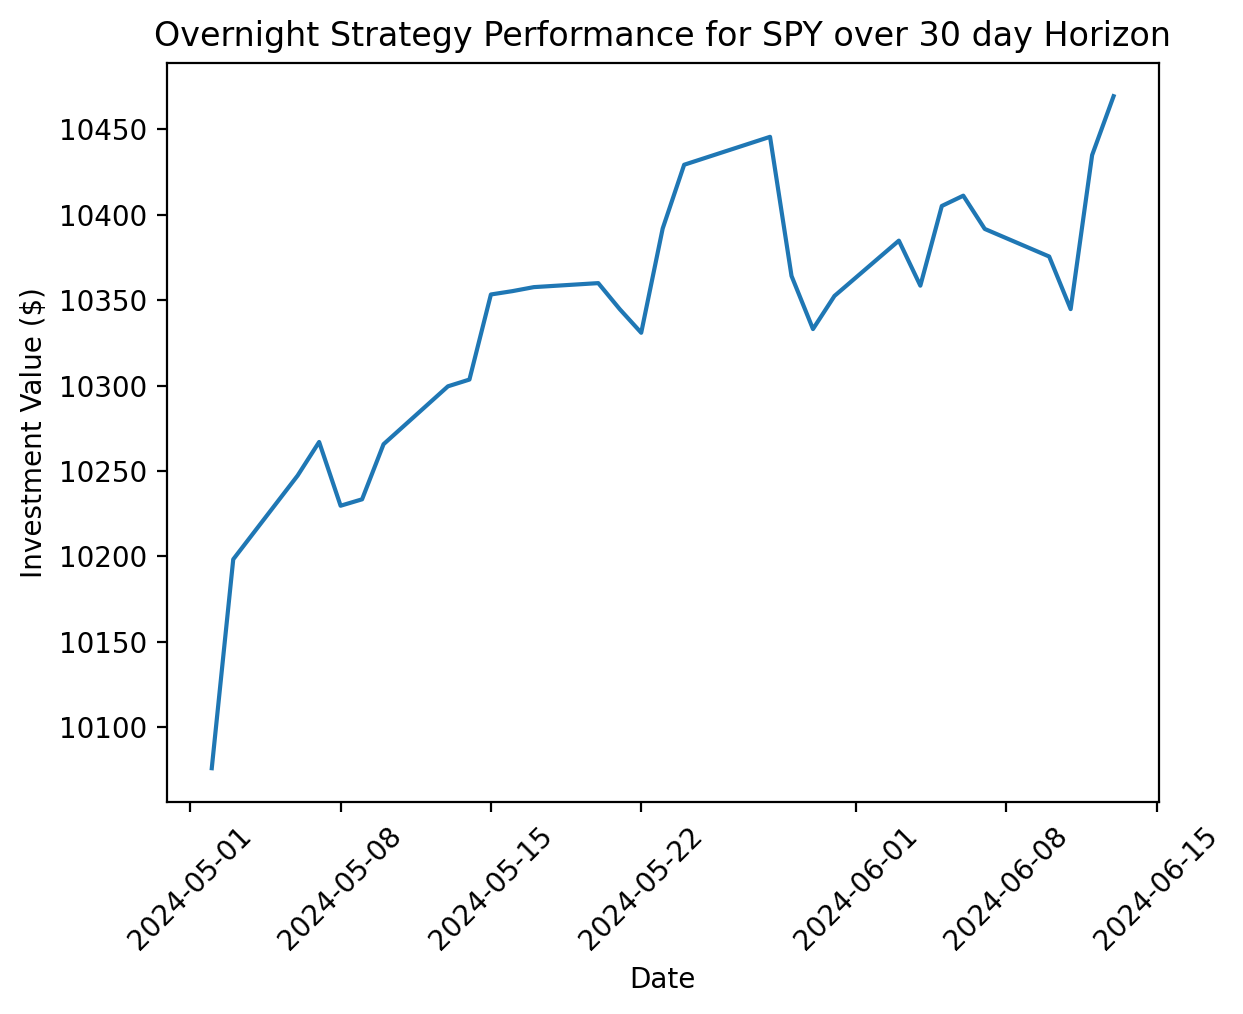

In [104]:
plt.plot(cumreturnON_30)
plt.xticks(rotation=45)
plt.title('Overnight Strategy Performance for SPY over 30 day Horizon')
plt.xlabel('Date')
plt.ylabel('Investment Value ($)')
plt.show() 
plt.show()

#### Buy & Hold except best 3 and worst 3 days

In [105]:
Horizon_30['Returns'] = Returnsbh_30
Horizon_30.head()

/var/folders/1p/qmn1bjm54llfy86krhb4f3g40000gn/T/ipykernel_23966/1253150879.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Horizon_30['Returns'] = Returnsbh_30


Open     High      Low    Close  Adj Close    Volume  Returns
Date                                                                        
2024-05-01 501.3800 508.1900 499.8700 500.3500   500.3500  80242800      NaN
2024-05-02 504.1500 505.8900 499.5500 505.0300   505.0300  62550200   0.0094
2024-05-03 511.1600 512.5500 508.5600 511.2900   511.2900  72756700   0.0124
2024-05-06 513.7500 516.6100 513.3000 516.5700   516.5700  47264700   0.0103
2024-05-07 517.5600 518.5700 516.4500 517.1400   517.1400  52561300   0.0011

In [106]:
sorted_data30 = Horizon_30.sort_values('Returns').dropna()
sorted_data30.head()

Open     High      Low    Close  Adj Close    Volume  Returns
Date                                                                        
2024-05-23 532.9600 533.0700 524.7200 525.9600   525.9600  57211200  -0.0073
2024-05-29 525.6800 527.3100 525.3700 526.1000   526.1000  45190300  -0.0070
2024-05-30 524.5200 525.2000 521.3300 522.6100   522.6100  46468500  -0.0066
2024-05-22 530.6500 531.3800 527.6000 529.8300   529.8300  48390000  -0.0029
2024-05-16 529.8800 531.5200 528.5400 528.6900   528.6900  50244800  -0.0021

In [107]:
returns_3 = sorted_data30.iloc[3:-3]
returns_2 = sorted_data30.iloc[2:-2]
returns_1 = sorted_data30.iloc[1:-1]

In [108]:
ReturnsBW3_30 = returns_3.sort_values('Date')
ReturnsBW2_30 = returns_2.sort_values('Date')
ReturnsBW1_30 = returns_1.sort_values('Date')

In [109]:
cumreturnsBHE3_30 = np.exp(np.log(1+ReturnsBW3_30['Returns']).cumsum()).mul(10000)
cumreturnsBHE2_30 = np.exp(np.log(1+ReturnsBW2_30['Returns']).cumsum()).mul(10000)
cumreturnsBHE1_30 = np.exp(np.log(1+ReturnsBW1_30['Returns']).cumsum()).mul(10000)

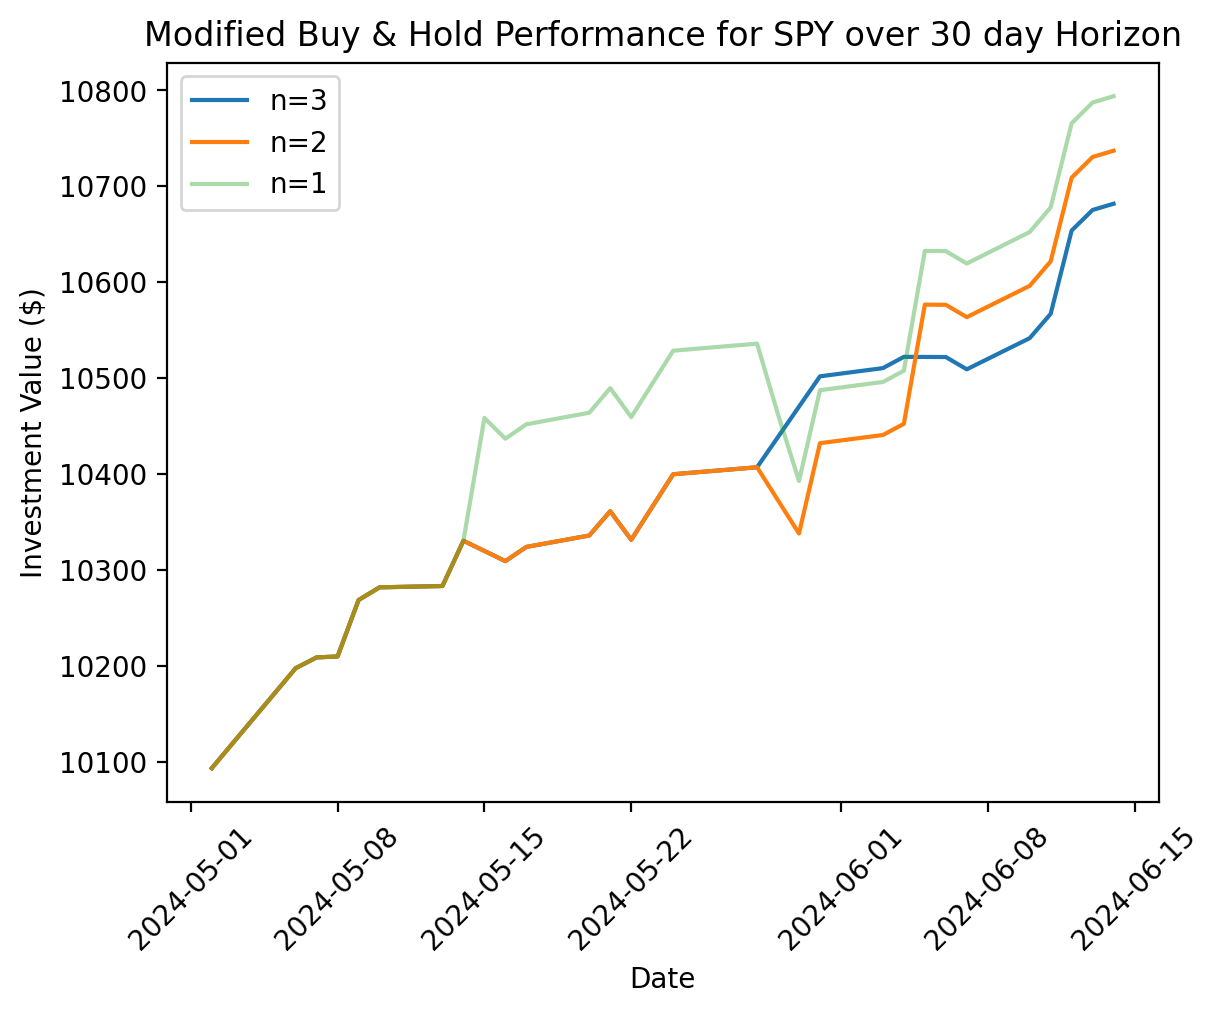

In [110]:
plt.plot(cumreturnsBHE3_30, label = 'n=3')
plt.plot(cumreturnsBHE2_30, label = 'n=2')
plt.plot(cumreturnsBHE1_30, label = 'n=1', alpha = 0.4)
plt.xticks(rotation=45)
plt.title('Modified Buy & Hold Performance for SPY over 30 day Horizon')
plt.xlabel('Date')
plt.ylabel('Investment Value ($)')
plt.legend()
plt.show()

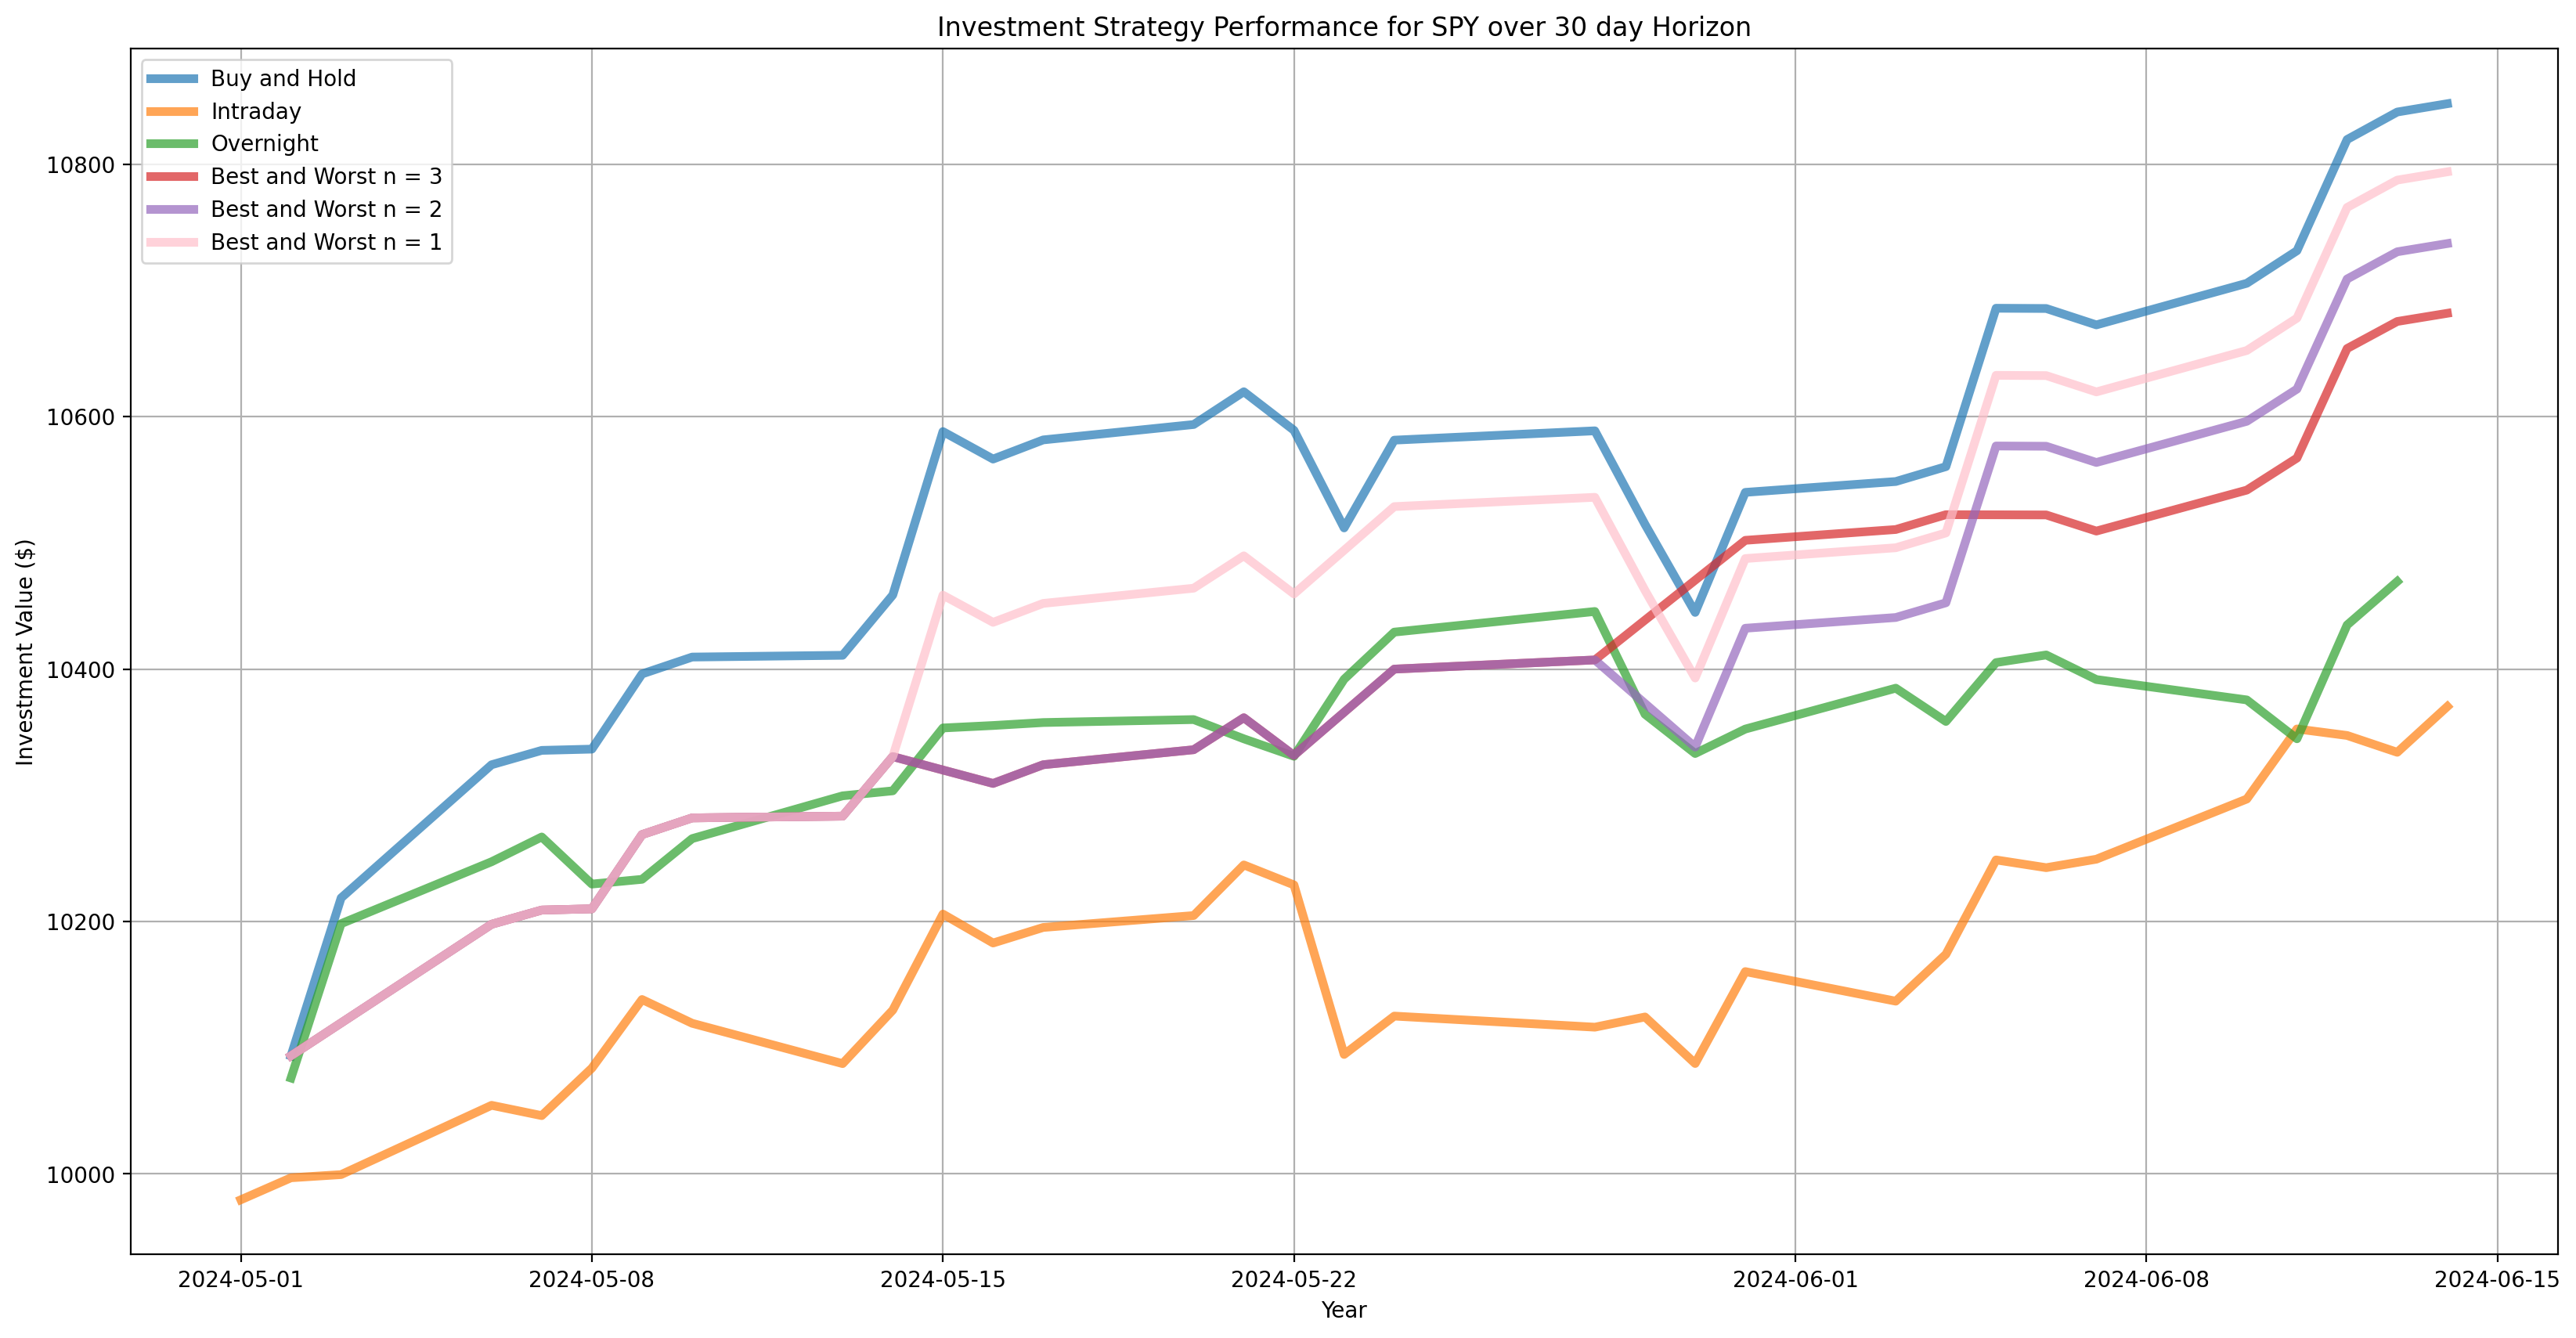

In [111]:
plt.figure(figsize = (20, 10))
plt.plot(cumreturnBH_30, label = "Buy and Hold", alpha=0.7, lw = 4)
plt.plot(cumreturnID_30, label = "Intraday", alpha=0.7, lw = 4)
plt.plot(cumreturnON_30,label = "Overnight", alpha=0.7, lw = 4)
plt.plot(cumreturnsBHE3_30, label = "Best and Worst n = 3", alpha=0.7, lw = 4)
plt.plot(cumreturnsBHE2_30, label = "Best and Worst n = 2", alpha=0.7, lw = 4)
plt.plot(cumreturnsBHE1_30, label = "Best and Worst n = 1", alpha=0.7, lw = 4, color = 'pink')
plt.legend()
plt.title('Investment Strategy Performance for SPY over 30 day Horizon')
plt.xlabel('Year')
plt.ylabel('Investment Value ($)')
plt.grid(True)

#### Performance of Trading Strategies for 30 Day Horizon

Comparing all the 4 strategies, we can see that each strategy provided a positive return at the end of the 30 Day investment horizon.

The best returns were provided by the Buy and Hold strategy (7.17%) with relatively lesser volatility throughout this period. Similarly the lowest returns were provided by the Overnight strategy (2.28%) which also saw a lot of volatility when compared to the rest of the strategies.

However, all the returns are subject to the capital gain tax which makes it difficult to conclude and give out a final number.

## 1 Year Returns

#### Buy and Hold Strategy

In [112]:
Horizon_1y = data.iloc[-253:]
Returnsbh_1y = (Horizon_1y['Adj Close'].pct_change())

In [113]:
cumreturnBH_1y = np.exp(np.log1p(Returnsbh_1y).cumsum()).mul(10000)

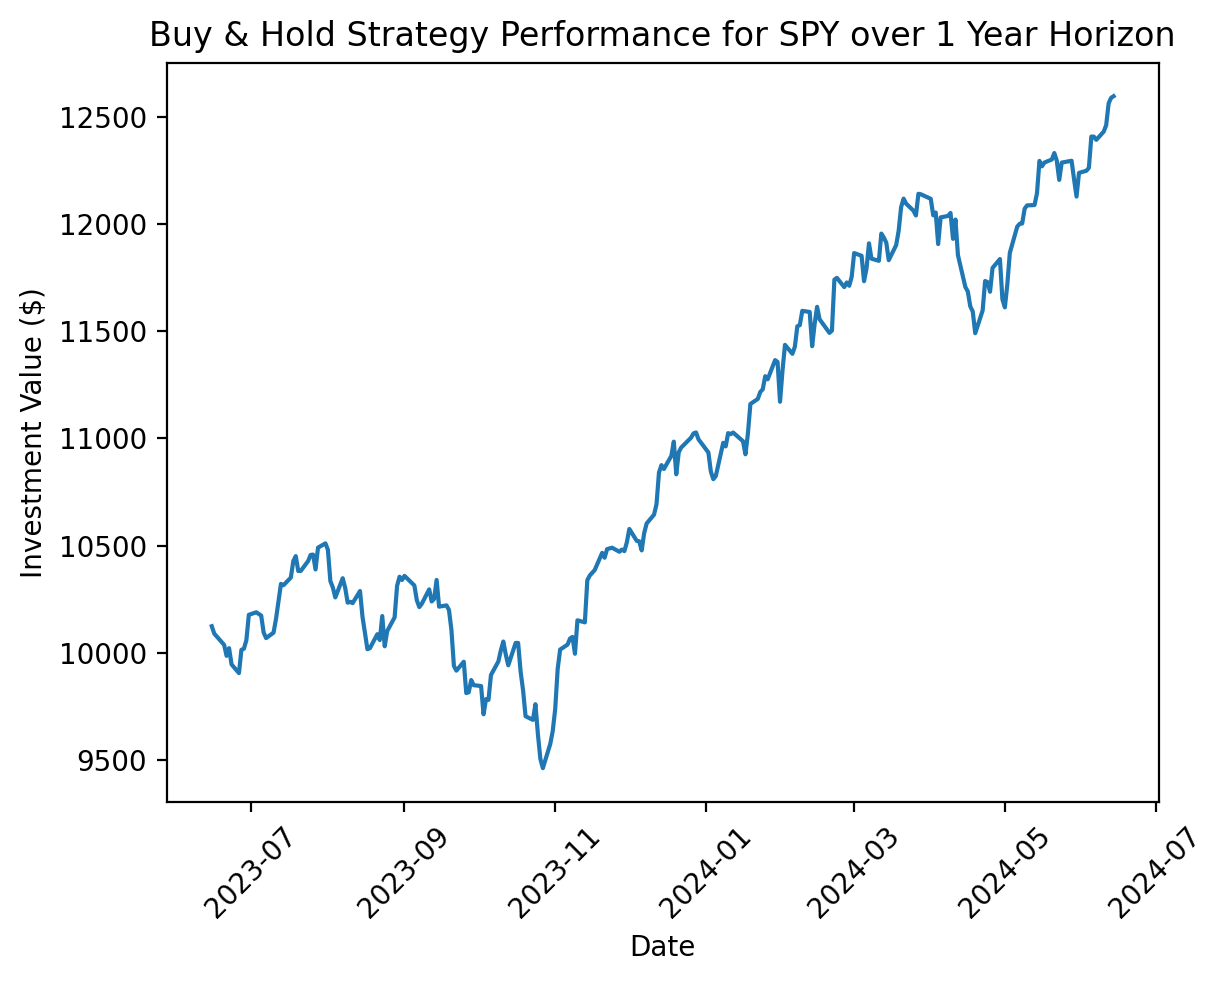

In [114]:
plt.plot(cumreturnBH_1y)
plt.xticks(rotation=45)
plt.title('Buy & Hold Strategy Performance for SPY over 1 Year Horizon')
plt.xlabel('Date')
plt.ylabel('Investment Value ($)')
plt.show()

#### Intraday Strategy

In [115]:
ReturnsID_1y = (Horizon_1y['Close'] - Horizon_1y['Open'])/Horizon_1y['Open']

In [116]:
cumreturnID_1y = np.exp(np.log1p(ReturnsID_1y).cumsum()).mul(10000)

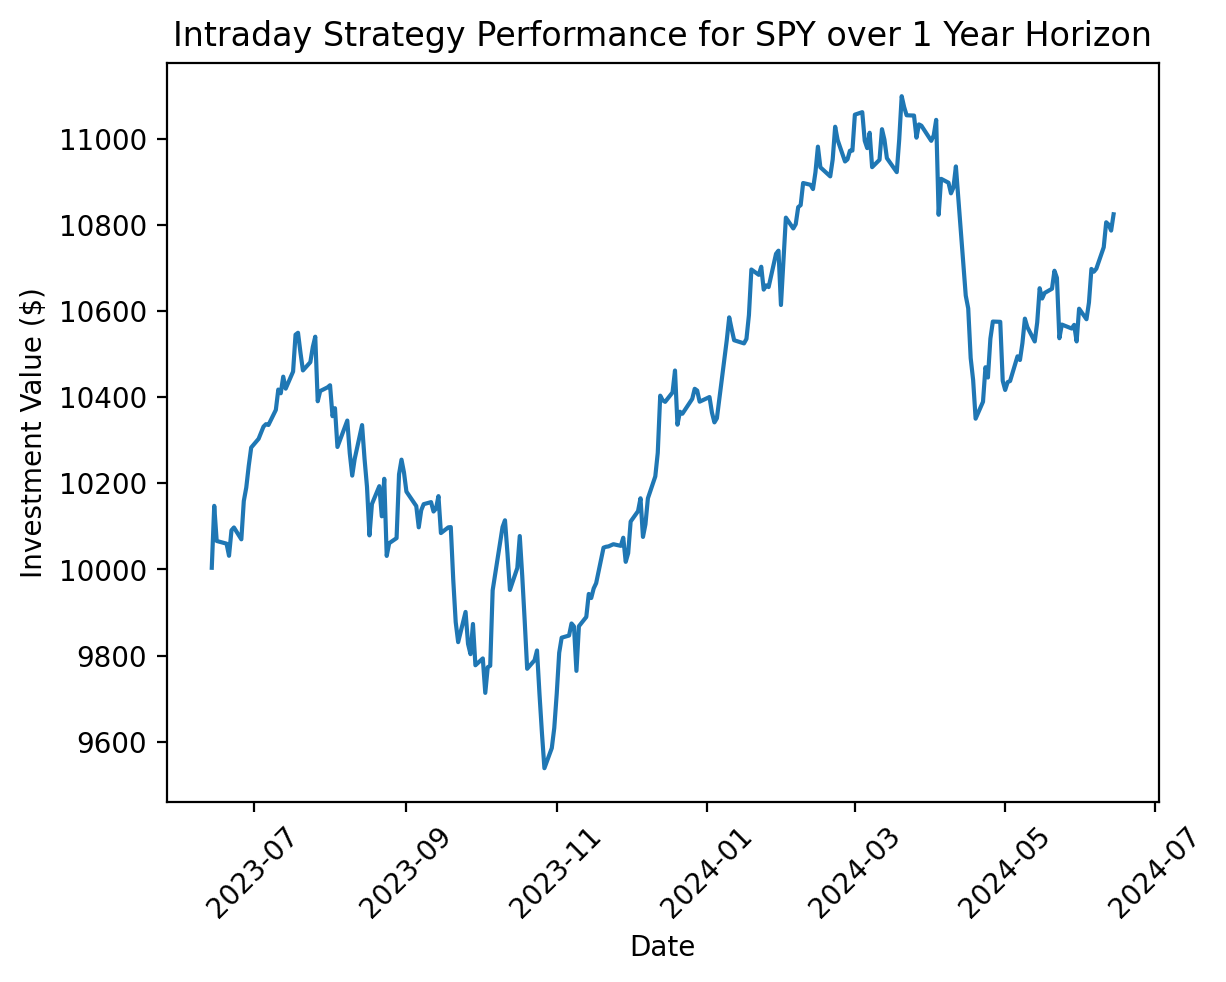

In [117]:
plt.plot(cumreturnID_1y)
plt.xticks(rotation=45)
plt.title('Intraday Strategy Performance for SPY over 1 Year Horizon')
plt.xlabel('Date')
plt.ylabel('Investment Value ($)')
plt.show()

#### Overnight Strategy

In [118]:
ReturnsON_1y = (1+Returnsbh_1y)/(1+ReturnsID_1y) - 1

In [119]:
cumreturnON_1y = np.exp(np.log1p(ReturnsON_1y[:-1]).cumsum()).mul(10000)

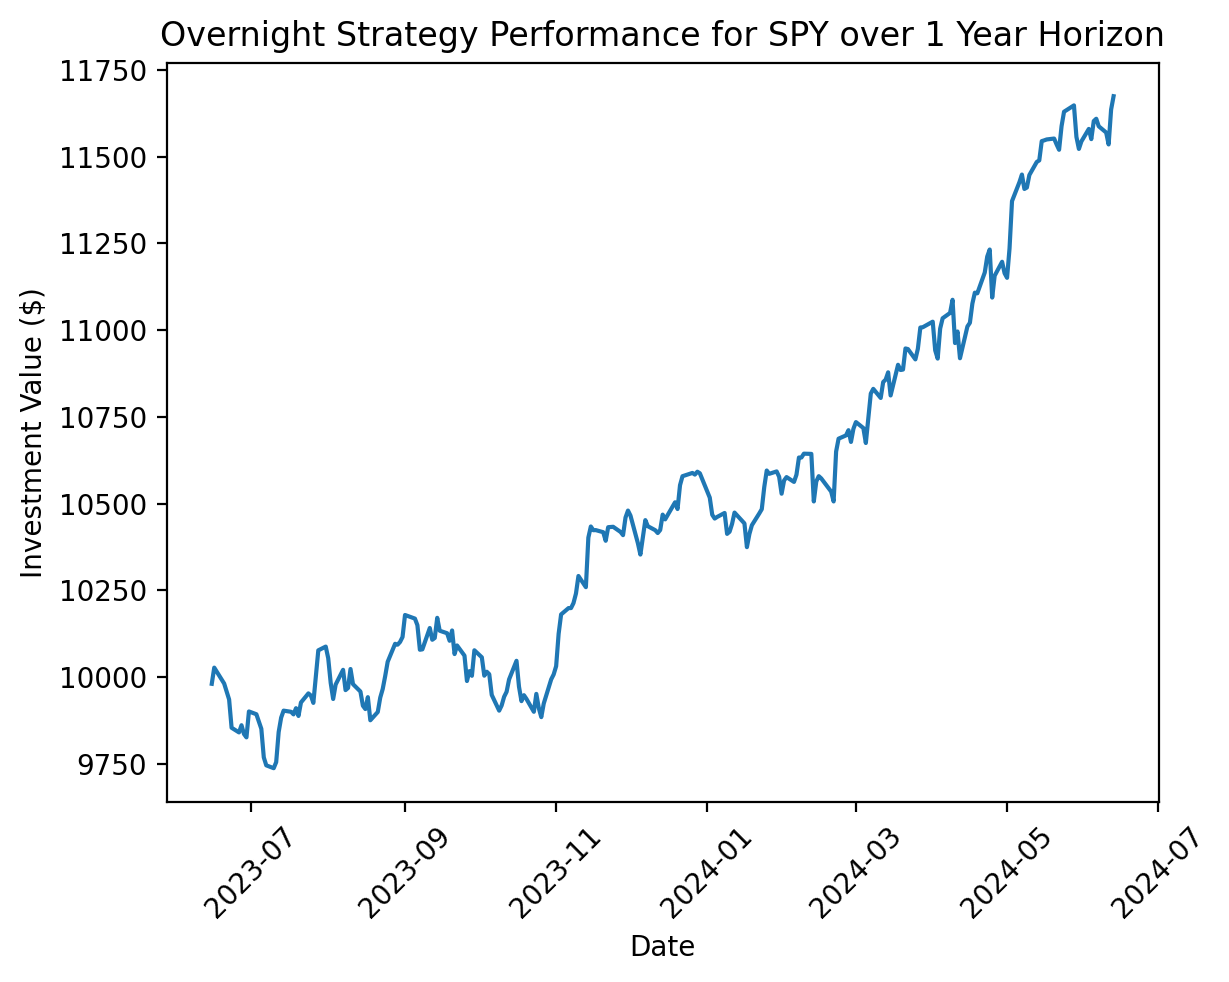

In [120]:
plt.plot(cumreturnON_1y)
plt.xticks(rotation=45)
plt.title('Overnight Strategy Performance for SPY over 1 Year Horizon')
plt.xlabel('Date')
plt.ylabel('Investment Value ($)')
plt.show()

#### Buy & Hold except best 3 and worst 3 days

In [121]:
Horizon_1y['Returns'] = Returnsbh_1y
Horizon_1y.head()

/var/folders/1p/qmn1bjm54llfy86krhb4f3g40000gn/T/ipykernel_23966/3829578705.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Horizon_1y['Returns'] = Returnsbh_1y


Open     High      Low    Close  Adj Close     Volume  Returns
Date                                                                         
2023-06-14 437.0100 439.0600 433.5900 437.1800   430.9395  100612100      NaN
2023-06-15 436.3300 443.9000 436.2300 442.6000   436.2821  110303100   0.0124
2023-06-16 443.0200 443.6100 438.9700 439.4600   434.7961  114121300  -0.0034
2023-06-20 437.4500 438.3700 435.0300 437.1800   432.5403   76160400  -0.0052
2023-06-21 436.1600 436.9900 434.3300 434.9400   430.3240   76982300  -0.0051

In [122]:
sorted_data1y = Horizon_1y.sort_values('Returns').dropna()
sorted_data1y.head()

Open     High      Low    Close  Adj Close     Volume  Returns
Date                                                                         
2023-09-21 435.7000 435.9700 431.2300 431.3900   428.3173  103976100  -0.0165
2024-01-31 488.6200 489.0800 482.8600 482.8800   481.3843  126011100  -0.0163
2024-04-30 508.5600 509.5600 501.9800 501.9800   501.9800   77483600  -0.0158
2023-09-26 429.0900 429.8200 425.0200 425.8800   422.8465   96168400  -0.0147
2023-10-25 421.8900 421.9200 417.0200 417.5500   414.5758   94223200  -0.0144

In [123]:
returns1y_3 = sorted_data1y.iloc[3:-3]
returns1y_2 = sorted_data1y.iloc[2:-2]
returns1y_1 = sorted_data1y.iloc[1:-1]

In [124]:
ReturnsBW3_1y = returns1y_3.sort_values('Date')
ReturnsBW2_1y = returns1y_2.sort_values('Date')
ReturnsBW1_1y = returns1y_1.sort_values('Date')

In [125]:
cumreturnsBHE3_1y = np.exp(np.log(1+ReturnsBW3_1y['Returns']).cumsum()).mul(10000)
cumreturnsBHE2_1y = np.exp(np.log(1+ReturnsBW2_1y['Returns']).cumsum()).mul(10000)
cumreturnsBHE1_1y = np.exp(np.log(1+ReturnsBW1_1y['Returns']).cumsum()).mul(10000)

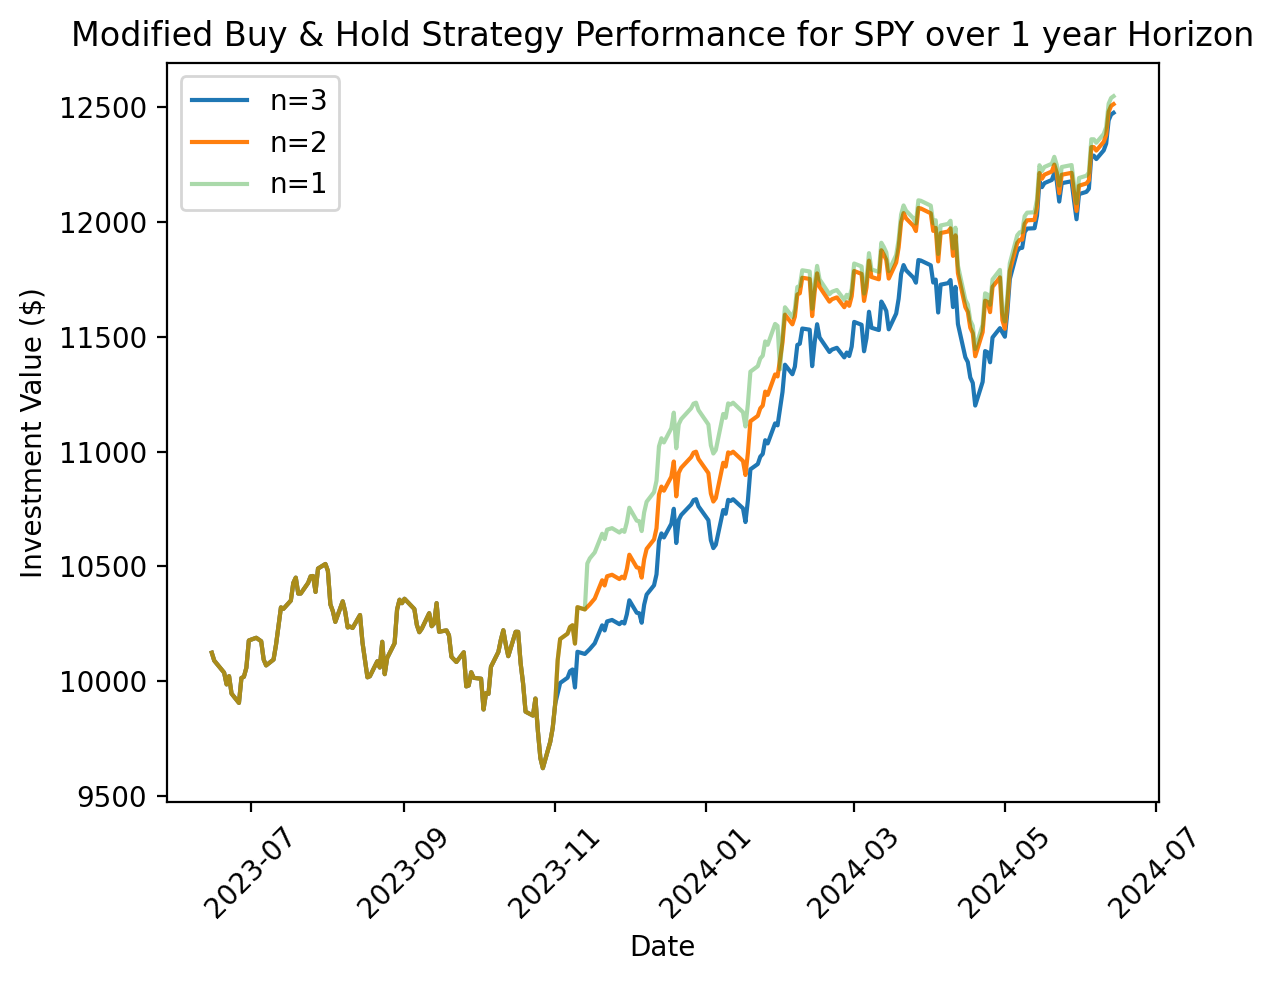

In [126]:
plt.plot(cumreturnsBHE3_1y, label = 'n=3')
plt.plot(cumreturnsBHE2_1y, label = 'n=2')
plt.plot(cumreturnsBHE1_1y, label = 'n=1', alpha = 0.4)
plt.xticks(rotation=45)
plt.title('Modified Buy & Hold Strategy Performance for SPY over 1 year Horizon')
plt.xlabel('Date')
plt.ylabel('Investment Value ($)')
plt.legend()
plt.show()

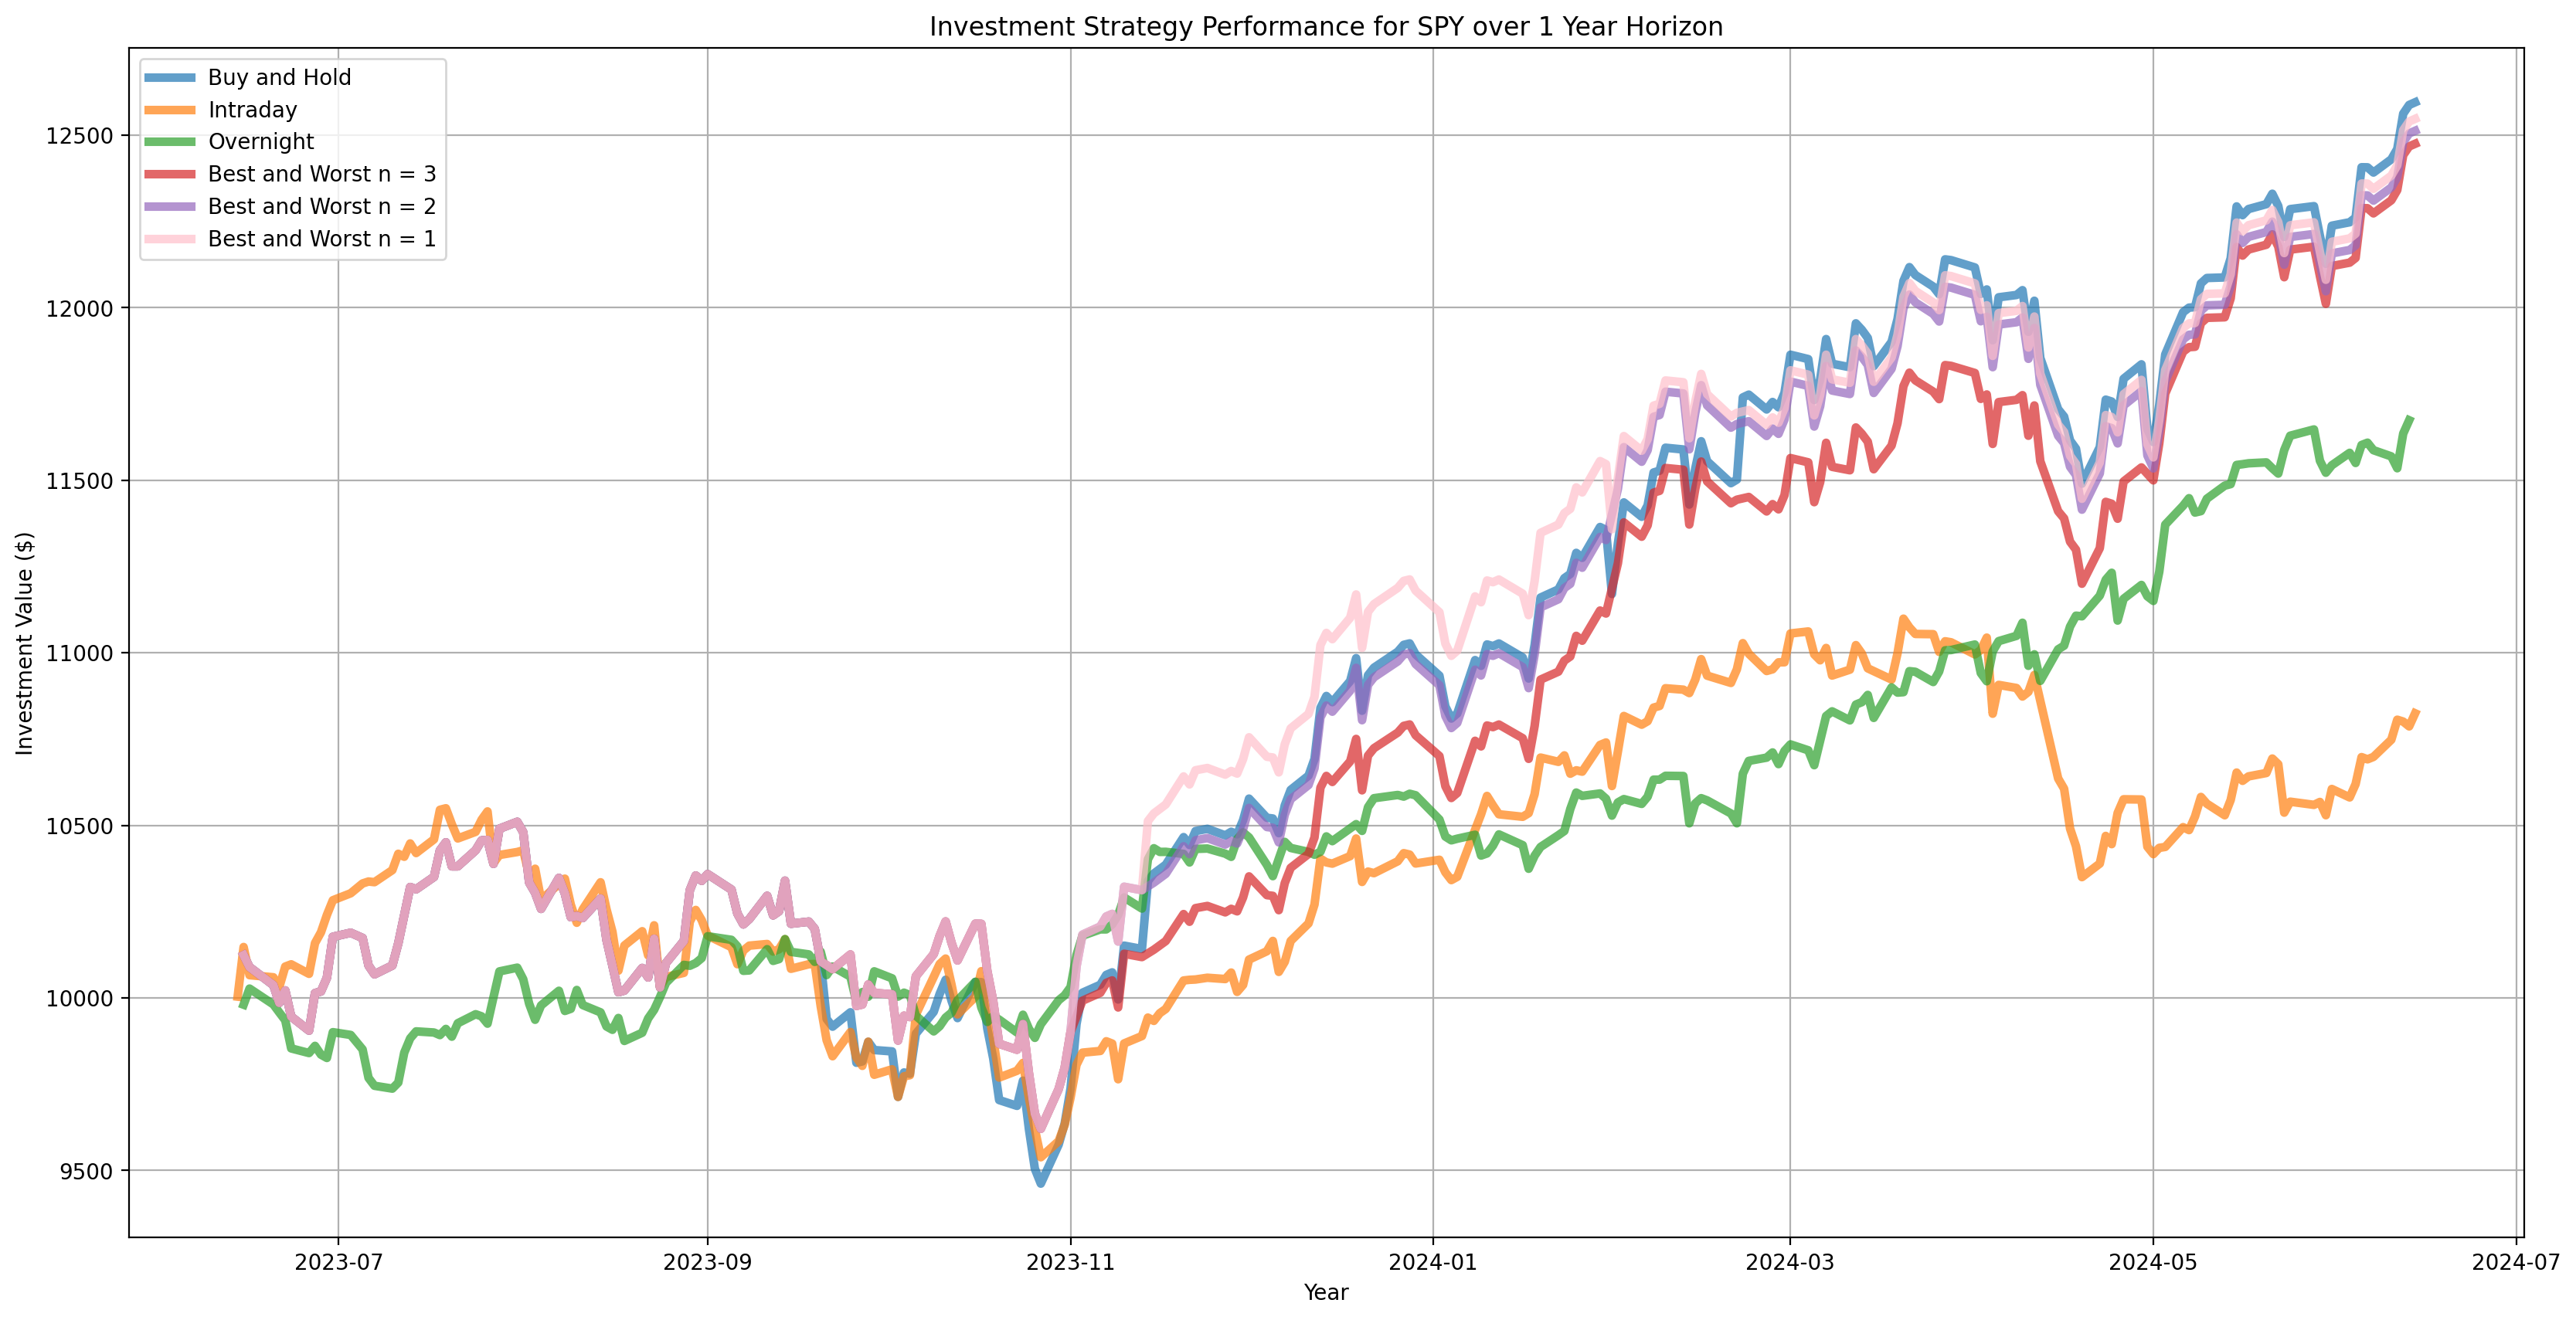

In [127]:
plt.figure(figsize = (20, 10))
plt.plot(cumreturnBH_1y, label = "Buy and Hold", alpha=0.7, lw = 4)
plt.plot(cumreturnID_1y, label = "Intraday", alpha=0.7, lw = 4)
plt.plot(cumreturnON_1y,label = "Overnight", alpha=0.7, lw = 4)
plt.plot(cumreturnsBHE3_1y, label = "Best and Worst n = 3", alpha=0.7, lw = 4)
plt.plot(cumreturnsBHE2_1y, label = "Best and Worst n = 2", alpha=0.7, lw = 4)
plt.plot(cumreturnsBHE1_1y, label = "Best and Worst n = 1", alpha=0.7, lw = 4, color = 'pink')
plt.legend()
plt.title('Investment Strategy Performance for SPY over 1 Year Horizon')
plt.xlabel('Year')
plt.ylabel('Investment Value ($)')
plt.grid(True)

#### Performance of Trading Strategies for 1 Year Horizon

On comparing all the 4 strategies over our horizon period of 1 year, all strategies yielded positive returns. 

However, the Buy & Hold strategy provided the highest return at 29.36% with lower volatility, transactional costs and taxes as compared to intraday and overnight strategies. 

While the modified Buy & Hold strategy shows similar results, excluding days can be subjective and unrealistic.

## 10 Year Returns

#### Buy and Hold Strategy

In [128]:
Horizon_10y = data.iloc[-2522:]
Returnsbh_10y = (Horizon_10y['Adj Close'].pct_change())

In [129]:
cumreturnBH_10y = np.exp(np.log1p(Returnsbh_10y).cumsum()).mul(10000)

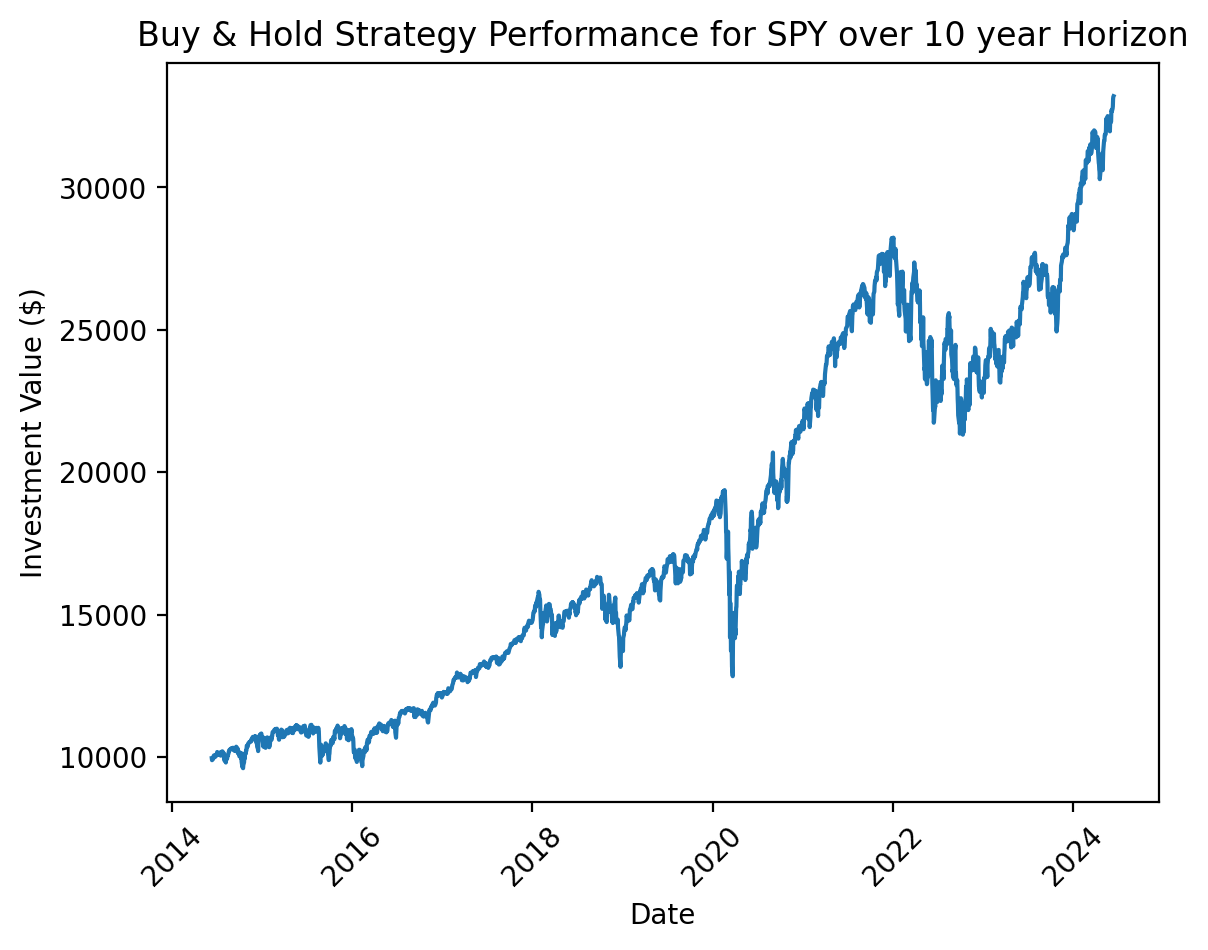

In [130]:
plt.plot(cumreturnBH_10y)
plt.xticks(rotation=45)
plt.title('Buy & Hold Strategy Performance for SPY over 10 year Horizon')
plt.xlabel('Date')
plt.ylabel('Investment Value ($)')
plt.show()

#### Intraday Strategy

In [131]:
ReturnsID_10y = (Horizon_10y['Close'] - Horizon_10y['Open'])/Horizon_10y['Open']

In [132]:
cumreturnID_10y = np.exp(np.log1p(ReturnsID_10y).cumsum()).mul(10000)

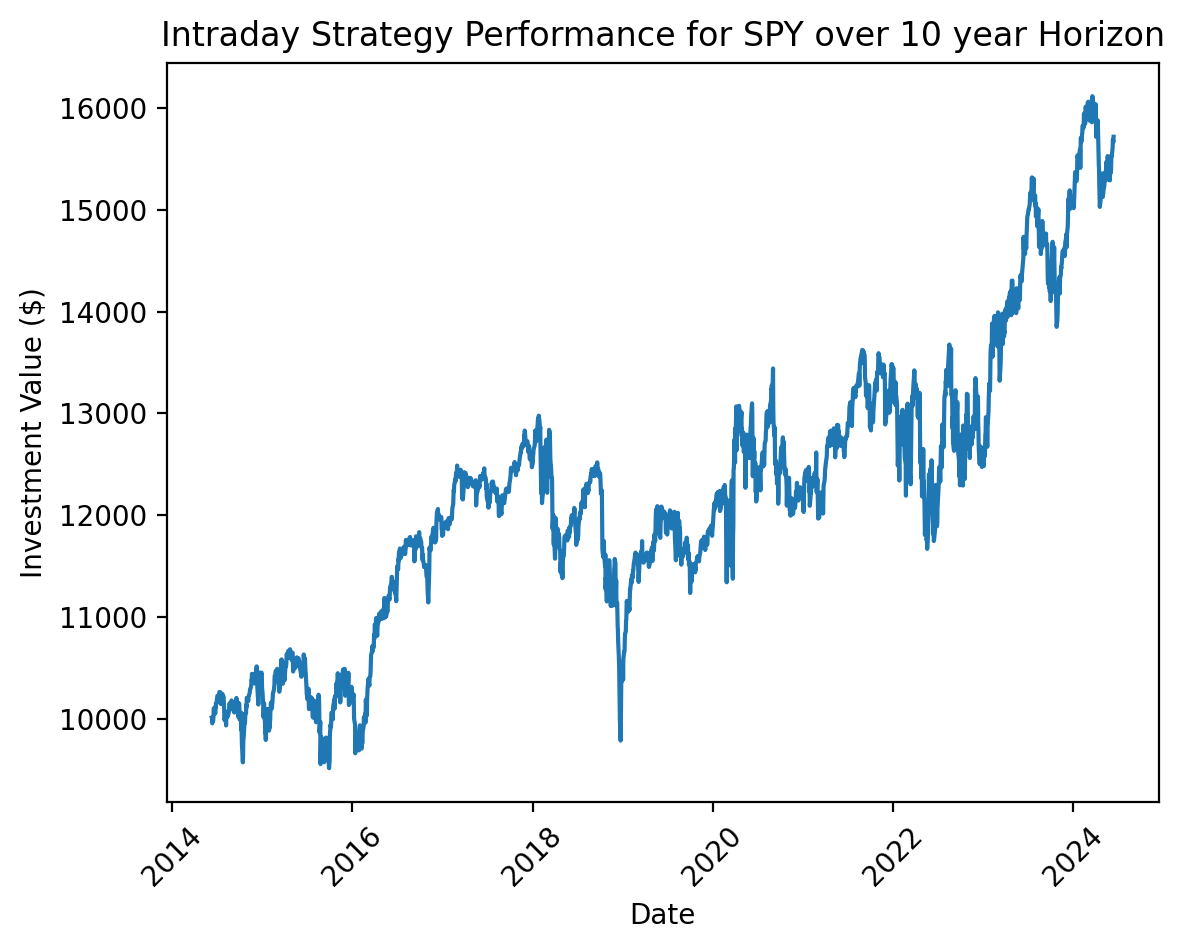

In [133]:
plt.plot(cumreturnID_10y)
plt.xticks(rotation=45)
plt.title('Intraday Strategy Performance for SPY over 10 year Horizon')
plt.xlabel('Date')
plt.ylabel('Investment Value ($)')
plt.show()

#### Overnight Strategy

In [134]:
ReturnsON_10y = (1+Returnsbh_10y)/(1+ReturnsID_10y) - 1

In [135]:
cumreturnON_10y = np.exp(np.log1p(ReturnsON_10y[:-1]).cumsum()).mul(10000)

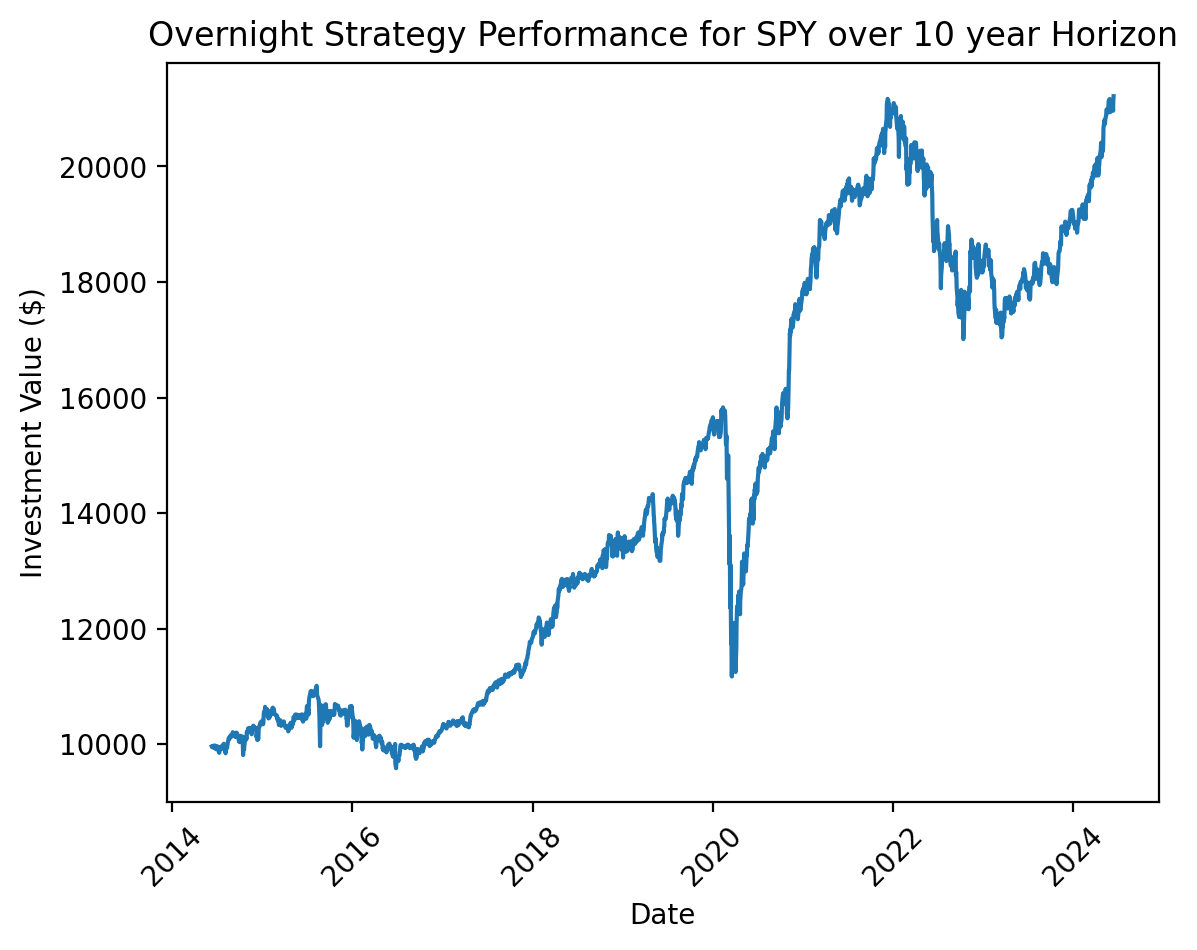

In [136]:
plt.plot(cumreturnON_10y)
plt.xticks(rotation=45)
plt.title('Overnight Strategy Performance for SPY over 10 year Horizon')
plt.xlabel('Date')
plt.ylabel('Investment Value ($)')
plt.show()

#### Buy & Hold except best 3 and worst 3 days

In [137]:
Horizon_10y['Returns'] = Returnsbh_10y
Horizon_10y.head()

/var/folders/1p/qmn1bjm54llfy86krhb4f3g40000gn/T/ipykernel_23966/873169269.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Horizon_10y['Returns'] = Returnsbh_10y


Open     High      Low    Close  Adj Close     Volume  Returns
Date                                                                         
2014-06-10 195.3400 195.6400 194.9200 195.6000   163.4648   57129000      NaN
2014-06-11 194.9000 195.1200 194.4800 194.9200   162.8965   68772000  -0.0035
2014-06-12 194.6900 194.8000 193.1100 193.5400   161.7432  106350000  -0.0071
2014-06-13 193.9200 194.3200 193.3000 194.1300   162.2363   82017000   0.0030
2014-06-16 193.8900 194.7000 193.6600 194.2900   162.3700   87424000   0.0008

In [138]:
sorted_data10y = Horizon_10y.sort_values('Returns').dropna()
sorted_data10y.head()

Open     High      Low    Close  Adj Close     Volume  Returns
Date                                                                         
2020-03-16 241.1800 256.9000 237.3600 239.8500   224.5256  297240000  -0.1094
2020-03-12 256.0000 266.6600 247.6800 248.1100   232.2579  392220700  -0.0957
2020-03-09 275.3000 284.1900 273.4500 274.2300   256.7091  309417300  -0.0781
2020-06-11 311.4600 312.1500 300.0100 300.6100   283.0582  209243600  -0.0576
2020-03-18 236.2500 248.3700 228.0200 240.0000   224.6660  327597100  -0.0506

In [139]:
returns10y_3 = sorted_data10y.iloc[3:-3]
returns10y_2 = sorted_data10y.iloc[2:-2]
returns10y_1 = sorted_data10y.iloc[1:-1]

In [140]:
ReturnsBW3_10y = returns10y_3.sort_values('Date')
ReturnsBW2_10y = returns10y_2.sort_values('Date')
ReturnsBW1_10y = returns10y_1.sort_values('Date')

In [141]:
cumreturnsBHE3_10y = np.exp(np.log(1+ReturnsBW3_10y['Returns']).cumsum()).mul(10000)
cumreturnsBHE2_10y = np.exp(np.log(1+ReturnsBW2_10y['Returns']).cumsum()).mul(10000)
cumreturnsBHE1_10y = np.exp(np.log(1+ReturnsBW1_10y['Returns']).cumsum()).mul(10000)

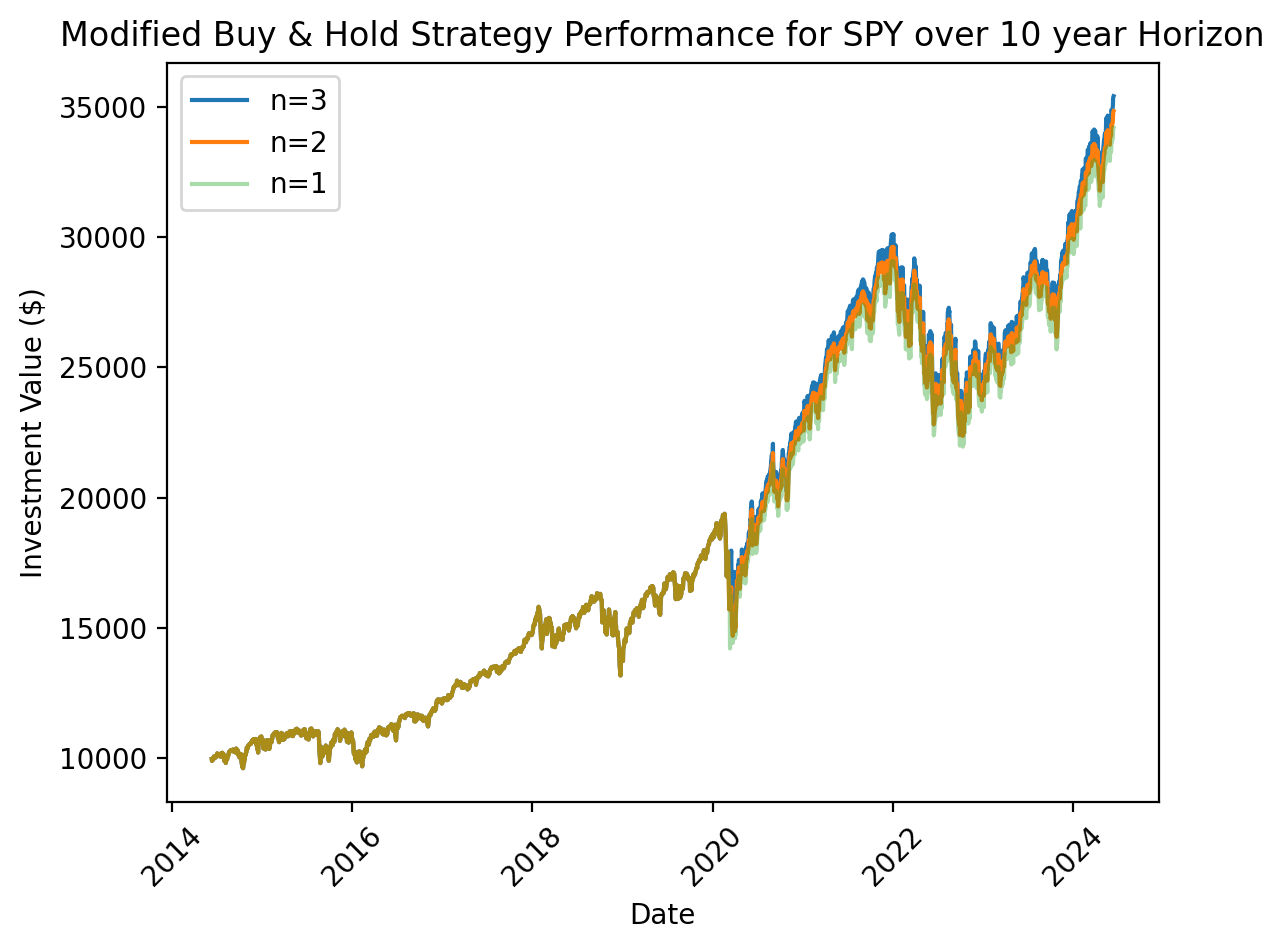

In [142]:
plt.plot(cumreturnsBHE3_10y, label = 'n=3')
plt.plot(cumreturnsBHE2_10y, label = 'n=2')
plt.plot(cumreturnsBHE1_10y, label = 'n=1', alpha = 0.4)
plt.xticks(rotation=45)
plt.title('Modified Buy & Hold Strategy Performance for SPY over 10 year Horizon')
plt.xlabel('Date')
plt.ylabel('Investment Value ($)')
plt.legend()
plt.show()

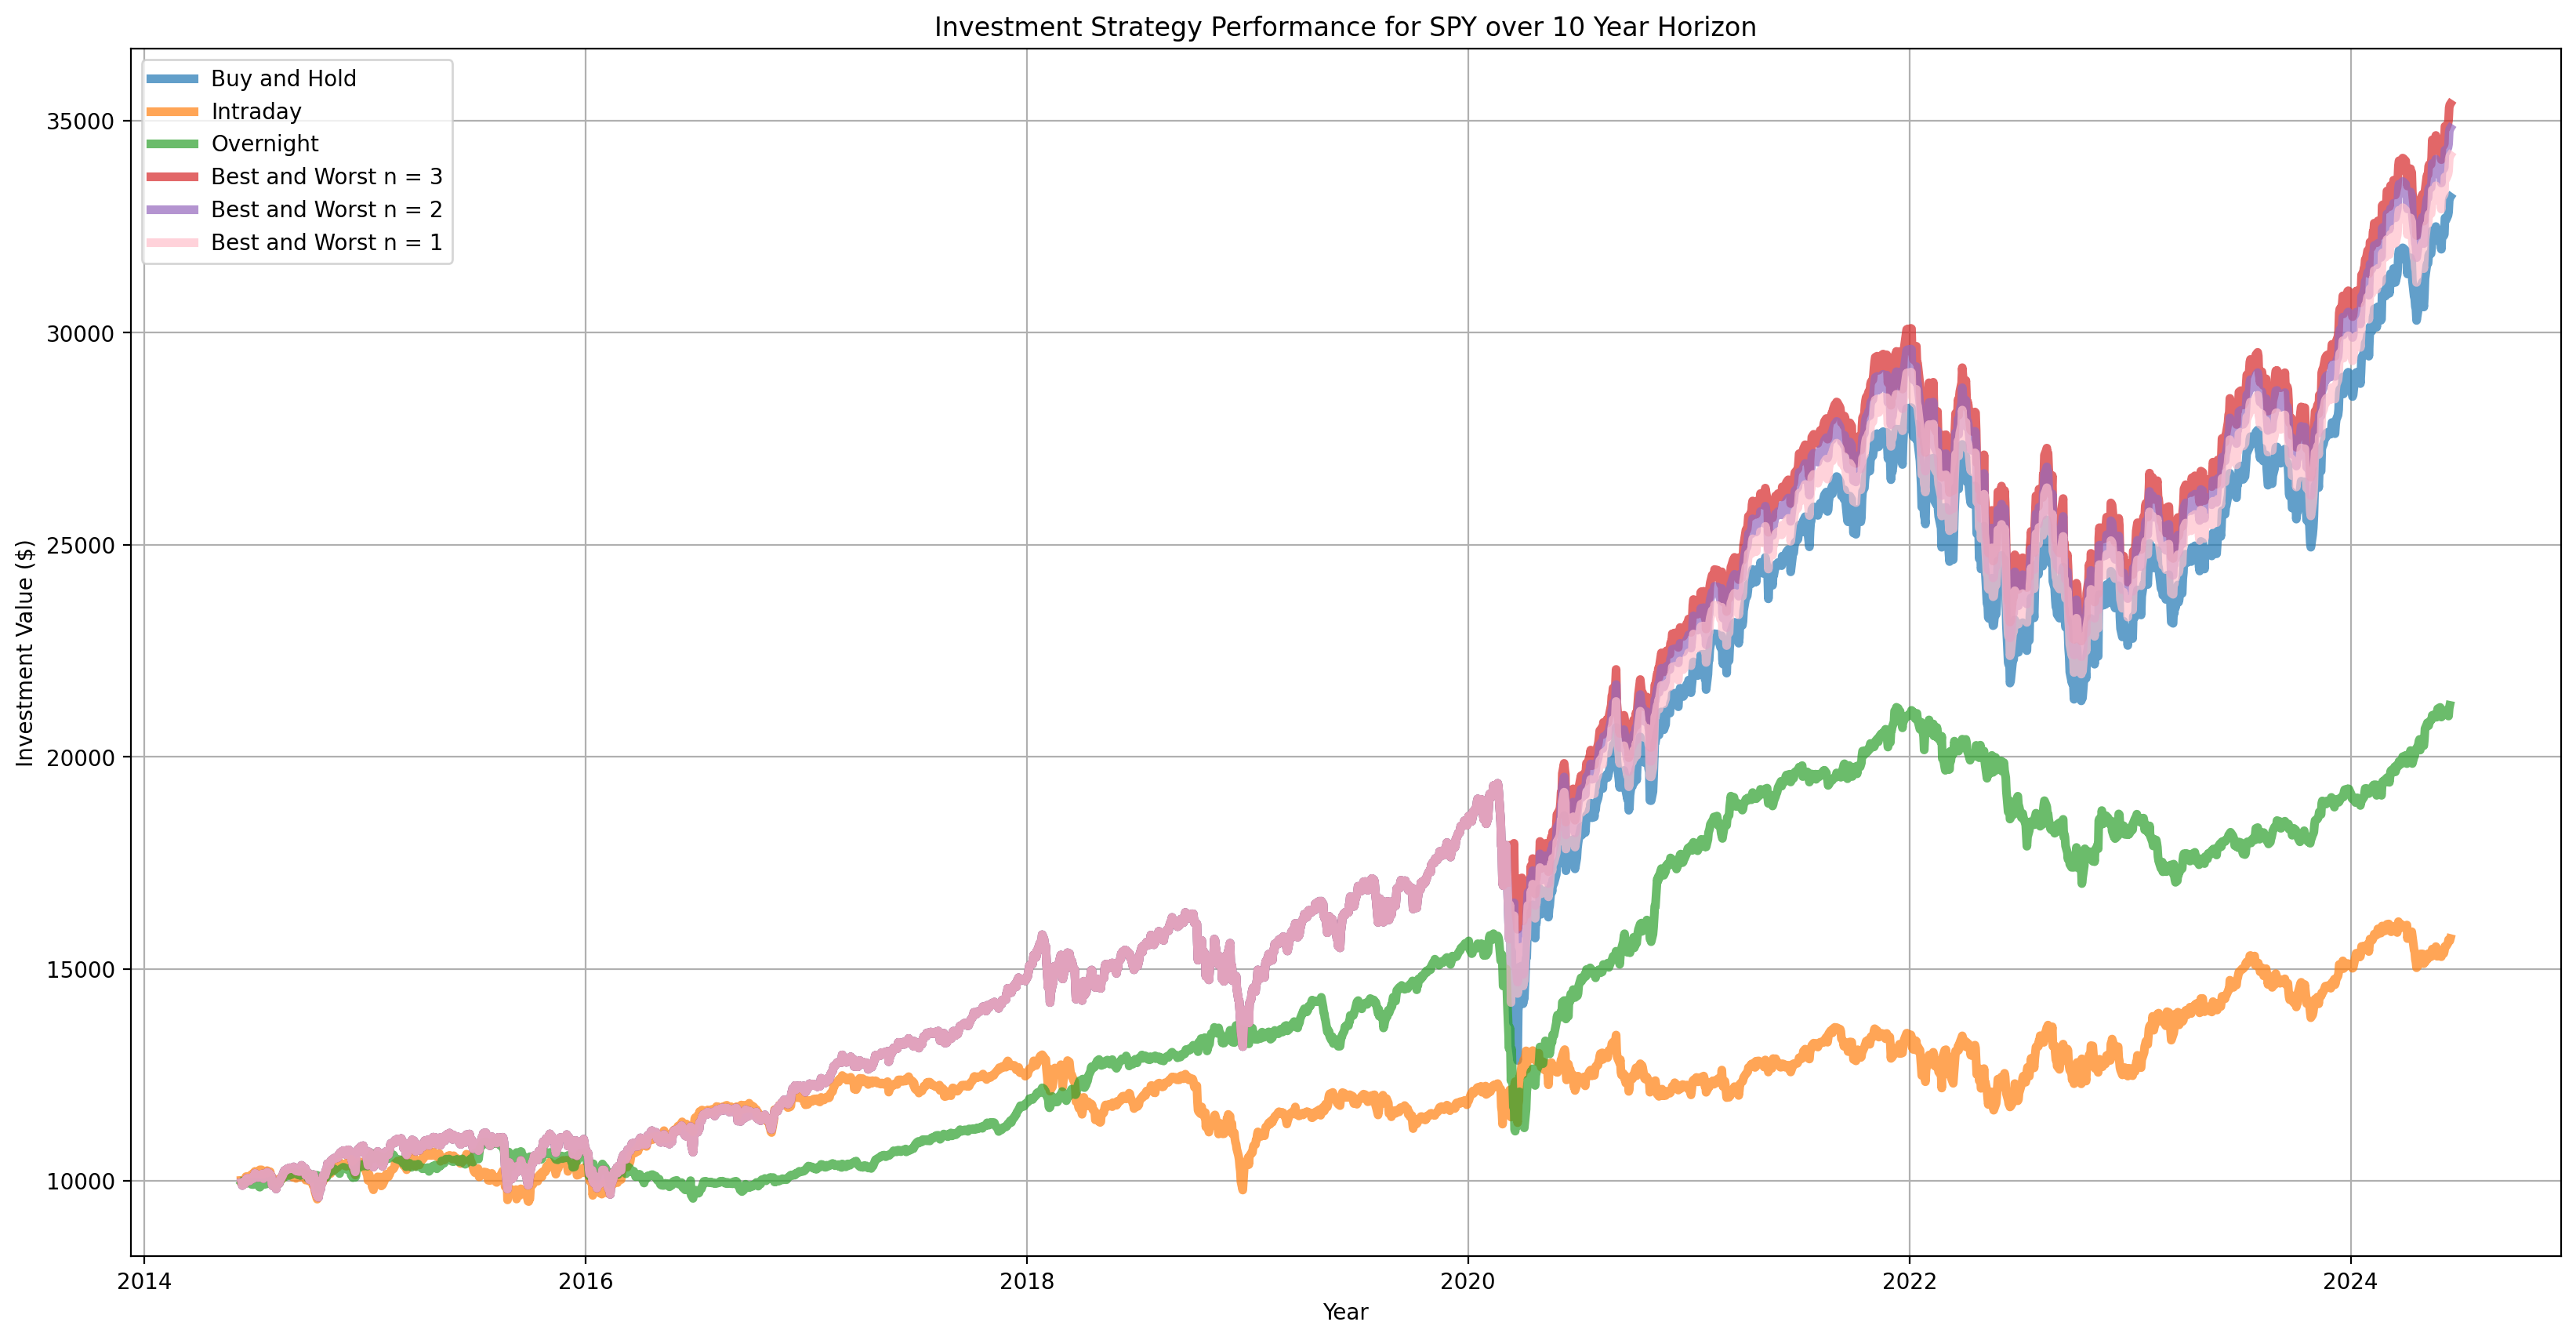

In [143]:
plt.figure(figsize = (20, 10))
plt.plot(cumreturnBH_10y, label = "Buy and Hold", alpha=0.7, lw = 4)
plt.plot(cumreturnID_10y, label = "Intraday", alpha=0.7, lw = 4)
plt.plot(cumreturnON_10y,label = "Overnight", alpha=0.7, lw = 4)
plt.plot(cumreturnsBHE3_10y, label = "Best and Worst n = 3", alpha=0.7, lw = 4)
plt.plot(cumreturnsBHE2_10y, label = "Best and Worst n = 2", alpha=0.7, lw = 4)
plt.plot(cumreturnsBHE1_10y, label = "Best and Worst n = 1", alpha=0.7, lw = 4, color = 'pink')
plt.legend()
plt.title('Investment Strategy Performance for SPY over 10 Year Horizon')
plt.xlabel('Year')
plt.ylabel('Investment Value ($)')
plt.grid(True)

#### Performance of Trading Strategies for 10 Year Horizon

In comparison, all 4 strategies lead to positive cumulative returns at the end of the 10 year investment horizon. 

The cumulative returns from the buy and hold strategy except for the worst and best 3 days were the highest. However it is difficult to say so conclusively due to the impact of capital gains tax.

The intraday strategy was the worst strategy to invest in, even without considering the tax on the returns.

## All time Returns

#### Buy and Hold Strategy

In [144]:
returns_bh = (data['Adj Close'].iloc[:-2].pct_change())

In [145]:
cumreturn_bh = np.exp(np.log1p(returns_bh).cumsum()).mul(10000)

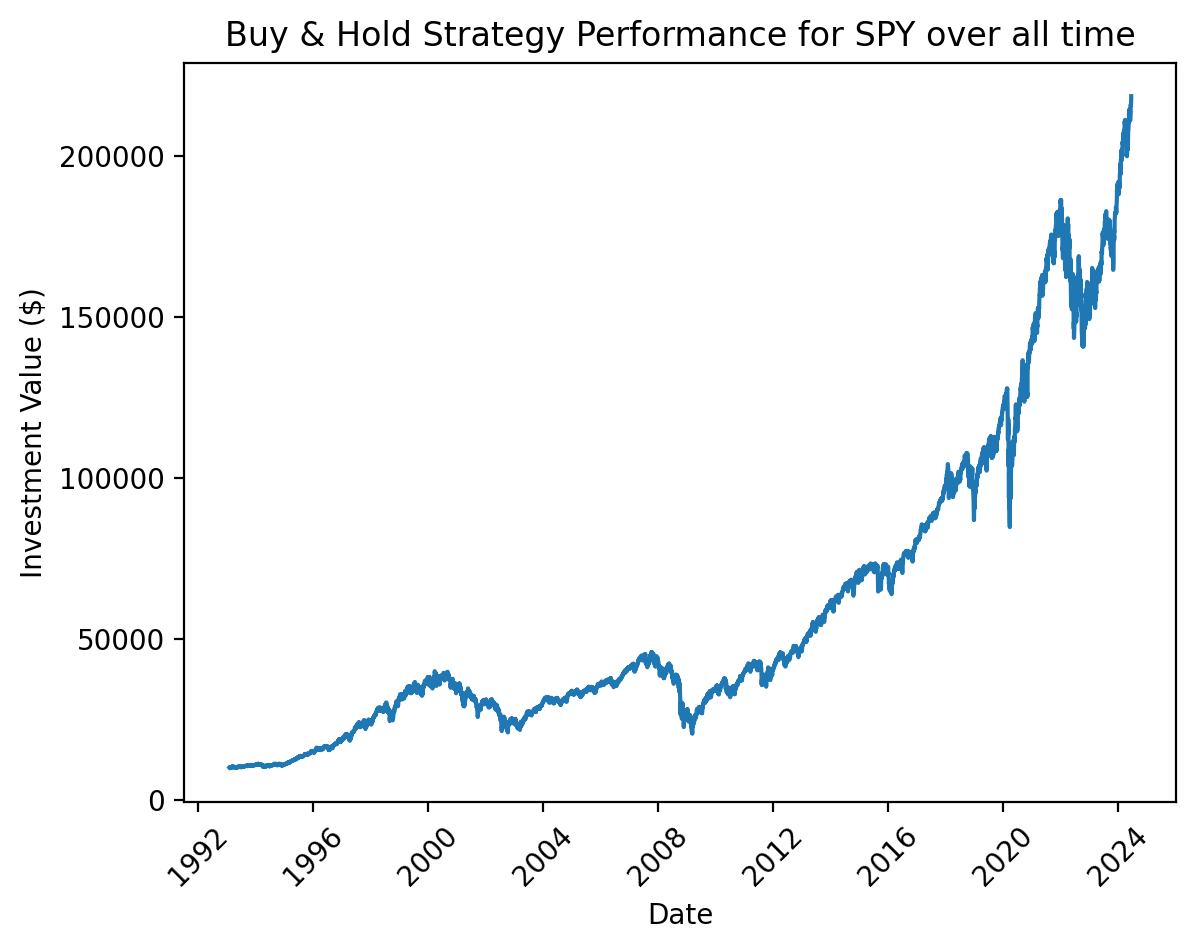

In [146]:
plt.plot(cumreturn_bh)
plt.xticks(rotation=45)
plt.title('Buy & Hold Strategy Performance for SPY over all time')
plt.xlabel('Date')
plt.ylabel('Investment Value ($)')
plt.show()

#### Intraday Returns

In [147]:
returns_ID = (data['Close'] - data['Open'])/data['Open']
returns_ID.iloc[:-2];

In [148]:
cumreturn_ID = np.exp(np.log1p(returns_ID).cumsum()).mul(10000)

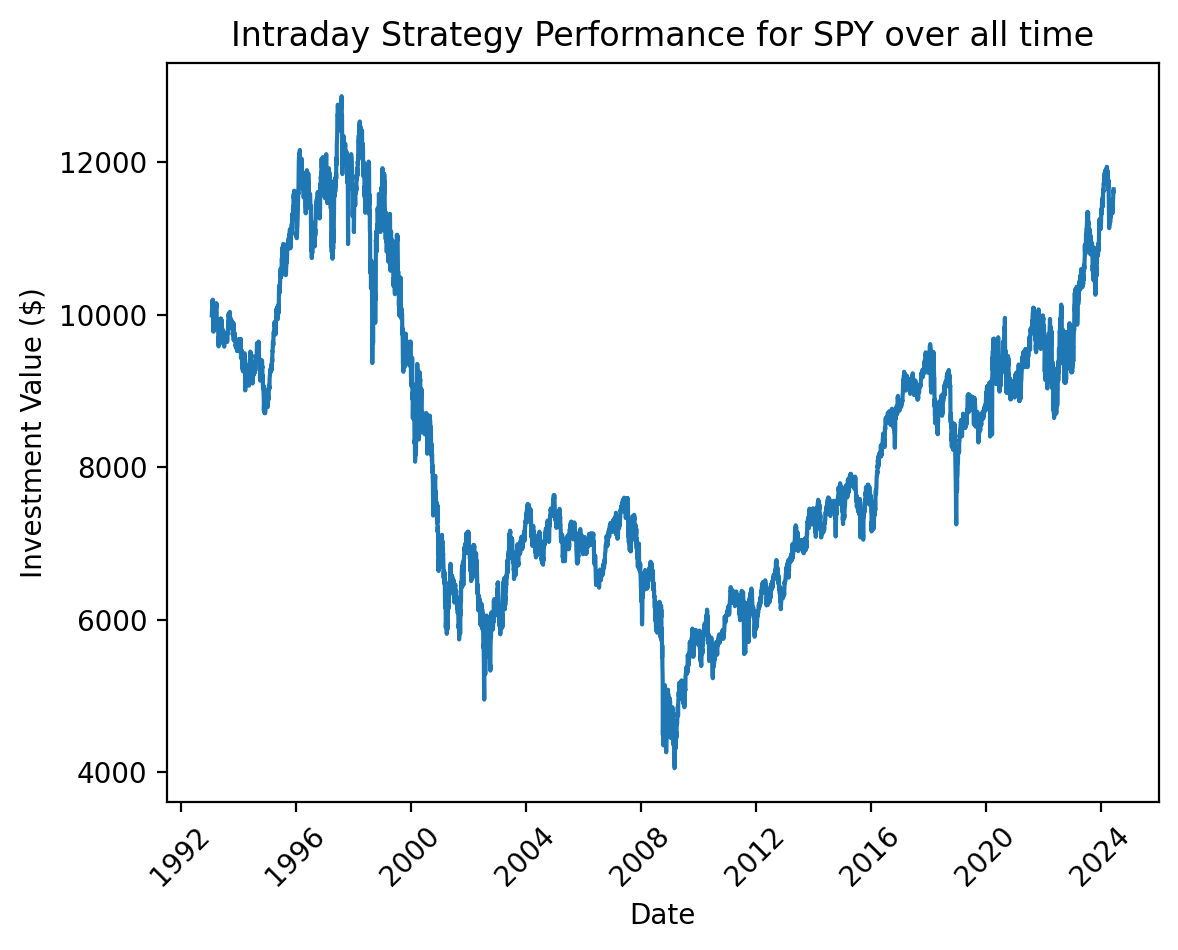

In [149]:
plt.plot(cumreturn_ID)
plt.xticks(rotation=45)
plt.title('Intraday Strategy Performance for SPY over all time')
plt.xlabel('Date')
plt.ylabel('Investment Value ($)')
plt.show()

#### Overnight Strategy

In [150]:
Returns_ON = (1+returns_bh)/(1+returns_ID) - 1
Returns_ON.iloc[:-1];

In [151]:
cumreturn_ON = np.exp(np.log1p(Returns_ON[:-1]).cumsum()).mul(10000)

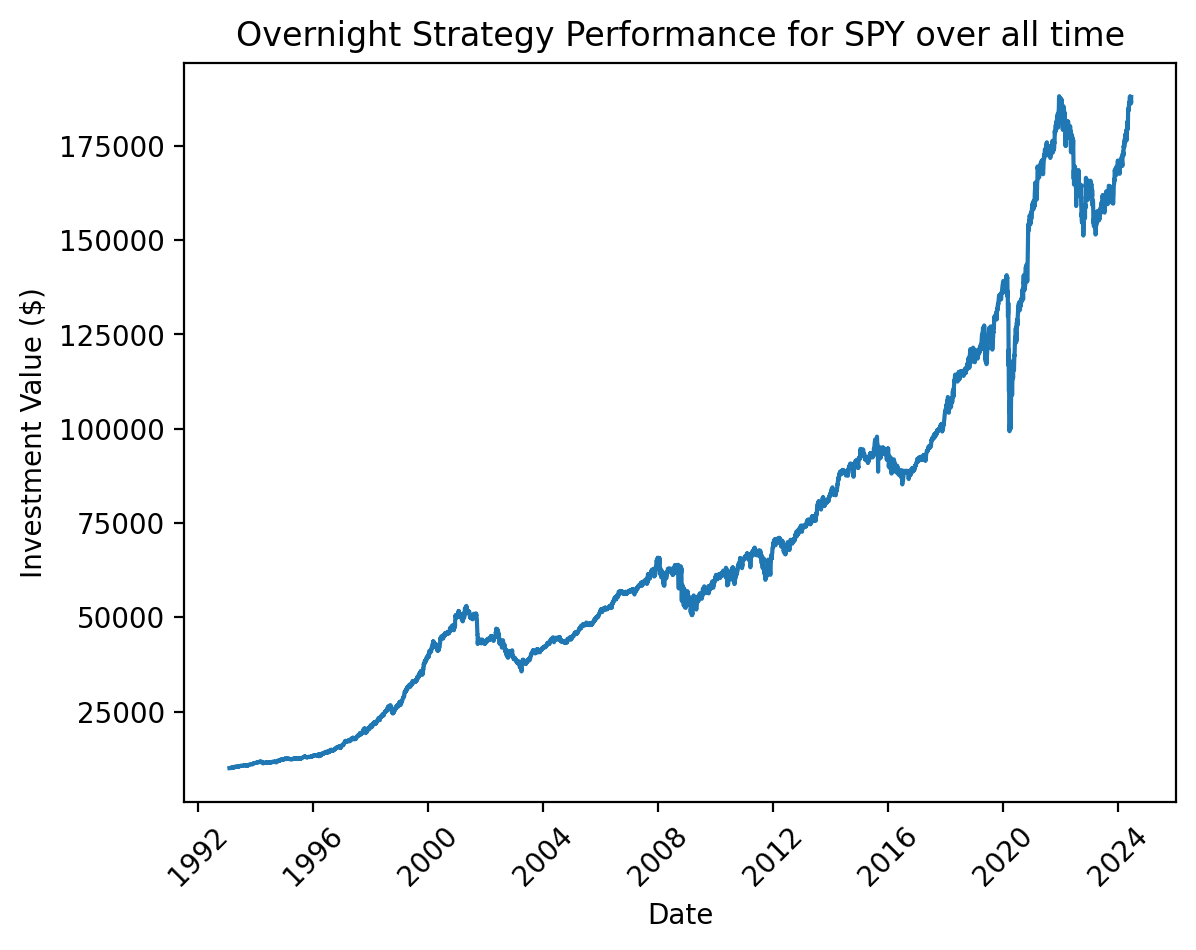

In [152]:
plt.plot(cumreturn_ON)
plt.xticks(rotation=45)
plt.title('Overnight Strategy Performance for SPY over all time')
plt.xlabel('Date')
plt.ylabel('Investment Value ($)')
plt.show()

#### Buy & Hold except best 3 and worst 3 days

In [153]:
data['Returns'] = returns_bh
data.head()

Open    High     Low   Close  Adj Close   Volume  Returns
Date                                                                   
1993-01-29 43.9688 43.9688 43.7500 43.9375    24.7637  1003200      NaN
1993-02-01 43.9688 44.2500 43.9688 44.2500    24.9399   480500   0.0071
1993-02-02 44.2188 44.3750 44.1250 44.3438    24.9927   201300   0.0021
1993-02-03 44.4062 44.8438 44.3750 44.8125    25.2569   529400   0.0106
1993-02-04 44.9688 45.0938 44.4688 45.0000    25.3626   531500   0.0042

In [154]:
sorted_data = data.sort_values('Returns').dropna()
sorted_data.head()

Open     High      Low    Close  Adj Close     Volume  Returns
Date                                                                         
2020-03-16 241.1800 256.9000 237.3600 239.8500   224.5256  297240000  -0.1094
2008-10-15  97.4600  97.8000  89.7100  90.0200    66.8904  484627500  -0.0984
2020-03-12 256.0000 266.6600 247.6800 248.1100   232.2579  392220700  -0.0957
2008-12-01  87.5100  87.5500  81.8600  82.1100    61.0128  369927100  -0.0886
2008-09-29 119.1400 119.3400 110.9700 111.3800    82.7622  459562300  -0.0784

In [155]:
returns_3 = sorted_data.iloc[3:-3]
returns_2 = sorted_data.iloc[2:-2]
returns_1 = sorted_data.iloc[1:-1]

In [156]:
ReturnsBW3 = returns_3.sort_values('Date')
ReturnsBW2 = returns_2.sort_values('Date')
ReturnsBW1 = returns_1.sort_values('Date')

In [157]:
cumreturnsBHE3 = np.exp(np.log(1+ReturnsBW3['Returns']).cumsum()).mul(10000)
cumreturnsBHE2 = np.exp(np.log(1+ReturnsBW2['Returns']).cumsum()).mul(10000)
cumreturnsBHE1 = np.exp(np.log(1+ReturnsBW1['Returns']).cumsum()).mul(10000)

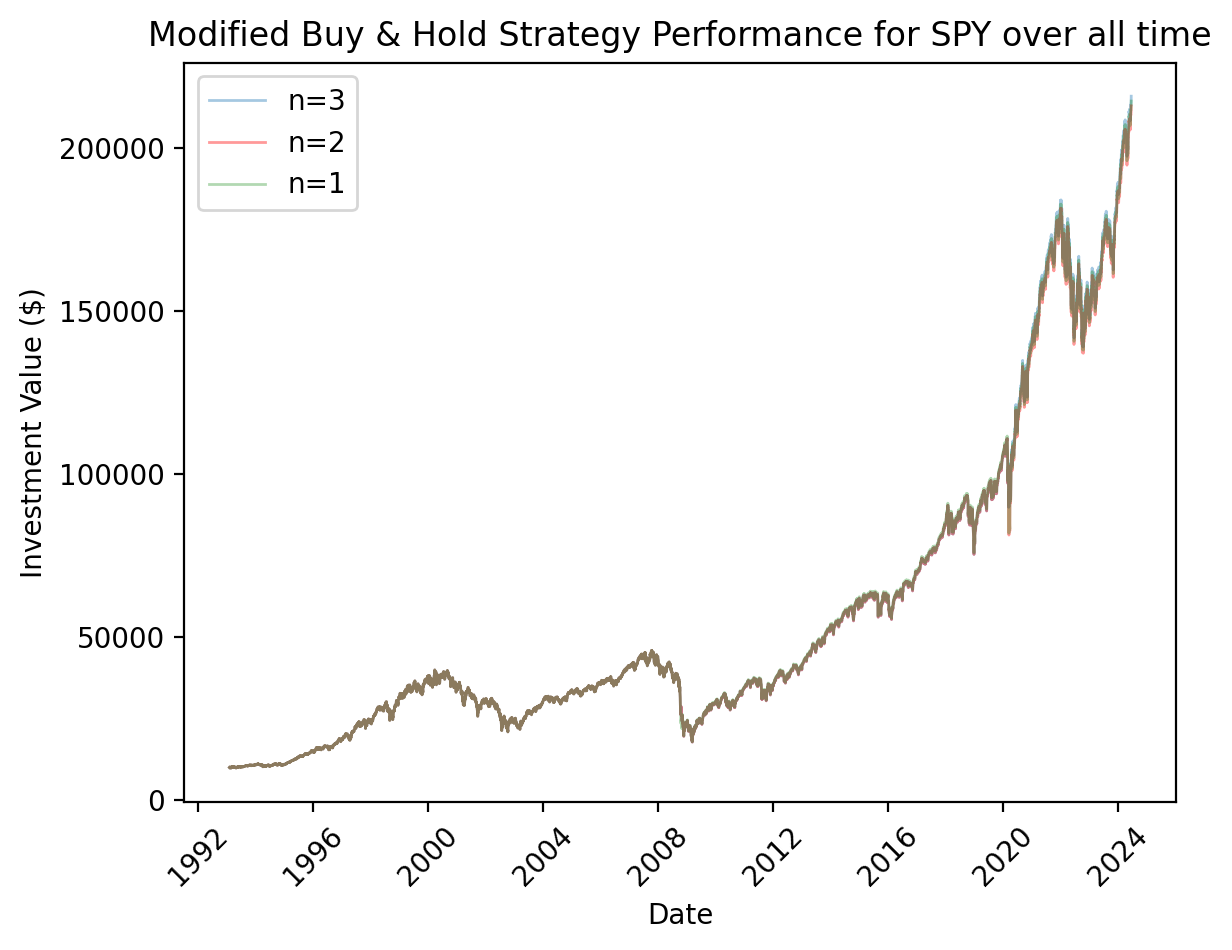

In [158]:
plt.plot(cumreturnsBHE3, label = 'n=3', alpha = 0.4, lw = 1)
plt.plot(cumreturnsBHE2, label = 'n=2', alpha = 0.4, lw = 1, color = 'red')
plt.plot(cumreturnsBHE1, label = 'n=1', alpha = 0.3, lw = 1, color = 'green')
plt.xticks(rotation=45)
plt.title('Modified Buy & Hold Strategy Performance for SPY over all time')
plt.xlabel('Date')
plt.ylabel('Investment Value ($)')
plt.legend()
plt.show()

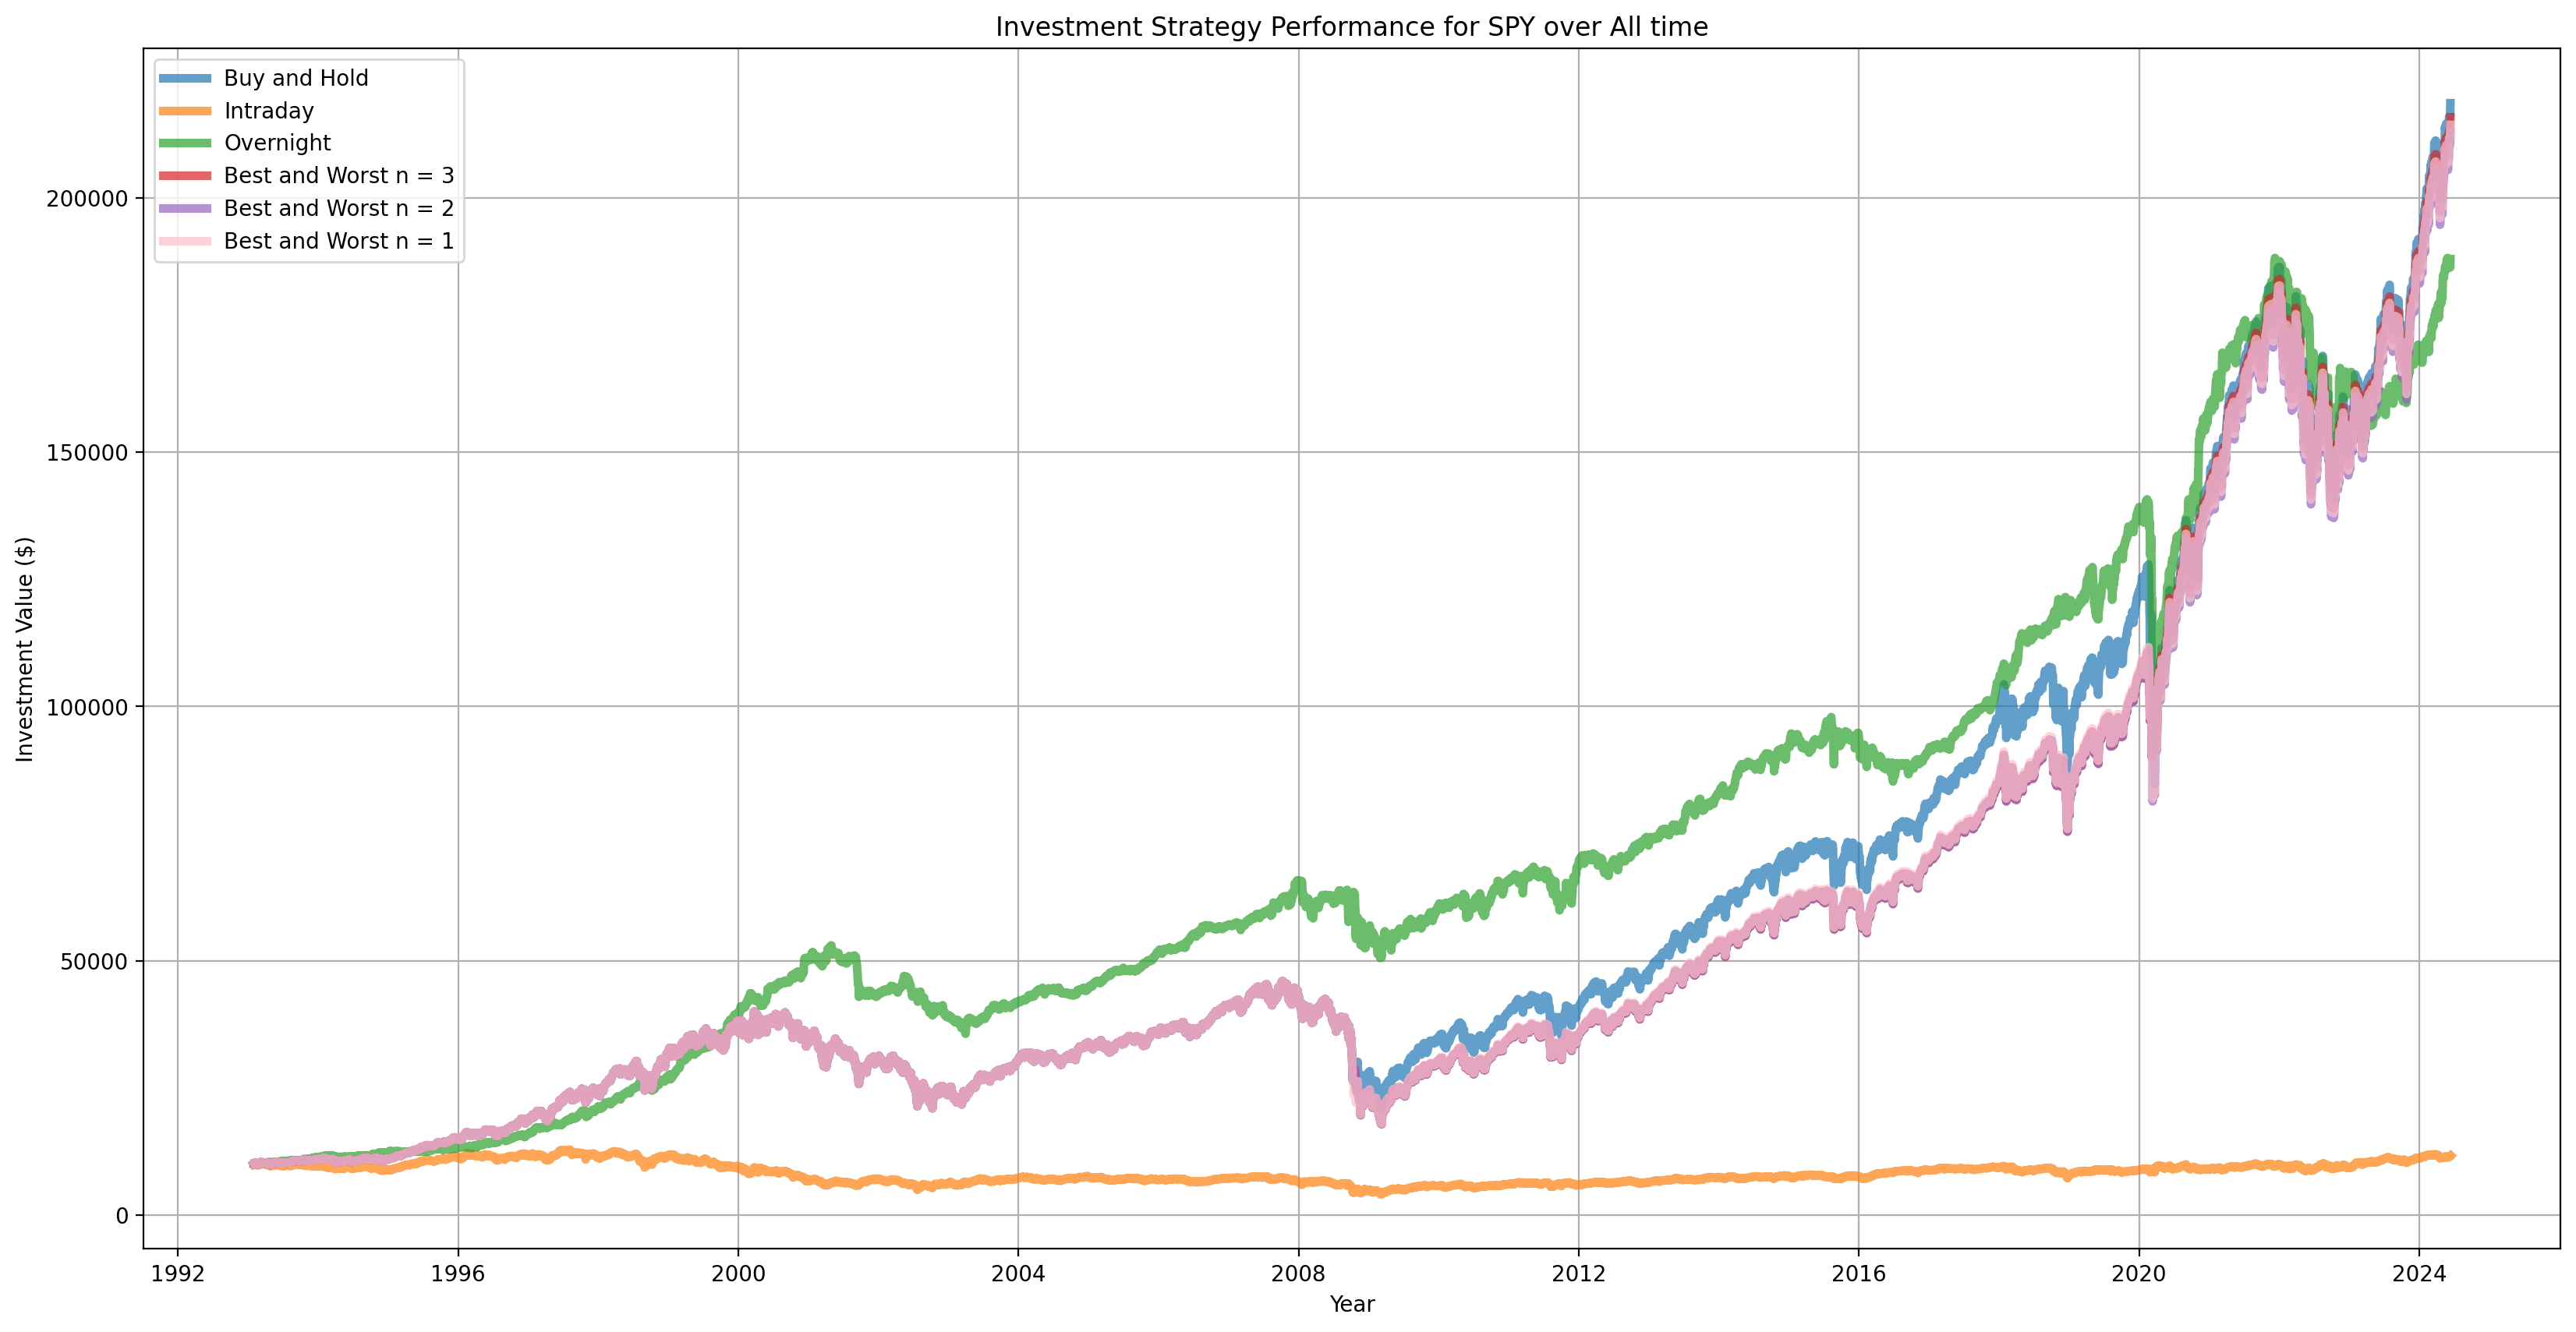

In [159]:
plt.figure(figsize = (20, 10))
plt.plot(cumreturn_bh, label = "Buy and Hold", alpha=0.7, lw = 4)
plt.plot(cumreturn_ID, label = "Intraday", alpha=0.7, lw = 4)
plt.plot(cumreturn_ON,label = "Overnight", alpha=0.7, lw = 4)
plt.plot(cumreturnsBHE3, label = "Best and Worst n = 3", alpha=0.7, lw = 4)
plt.plot(cumreturnsBHE2, label = "Best and Worst n = 2", alpha=0.7, lw = 4)
plt.plot(cumreturnsBHE1, label = "Best and Worst n = 1", alpha=0.7, lw = 4, color = 'pink')
plt.legend()
plt.title('Investment Strategy Performance for SPY over All time')
plt.xlabel('Year')
plt.ylabel('Investment Value ($)')
plt.grid(True)

#### Performance of Trading Strategies (All Time)

Comparing all the 4 strategies for the period of 30 years, we can conclude that the buy and hold strategy provided the highest returns over the period. Intraday provided least returns in comparison with the other strategies.

Except for Intraday, every other strategy observed a significant drop in overall returns during 2020 and a huge spike in returns right after that. But all the four strategies yielded positive returns at the end of 30 years.

# Sharpe Ratio

In [160]:
Rf_data = yf.download(tickers = '^IRX')
Rf = Rf_data.head(-1).loc['1993-01-29':]

[*********************100%%**********************]  1 of 1 completed


### 30 Day Sharpe ratio

#### Best Strategy: Buy & Hold

In [161]:
AnnualizedBH_30 = (((1 + Returnsbh_30.mean())**32) - 1)*100

In [162]:
SD_30 = Returnsbh_30.std()*100
AnnualizedSD_30 = np.sqrt(12)*SD_30

In [163]:
SharpeBH_30 = (AnnualizedBH_30 - Rf['Adj Close'].iloc[-32:].mean()) / AnnualizedSD_30
SharpeBH_30

1.9157

#### 2nd Best Strategy: Excluding Best & Worst 2 days

In [164]:
AnnualizedBW_30 = (((1 + ReturnsBW2_30['Returns'].mean())**32) - 1)*100

In [165]:
SD2_30 = ReturnsBW2_30['Returns'].std()*100
AnnualizedSD2_30 = np.sqrt(12)*SD2_30

In [166]:
SharpeBW_30 = (AnnualizedBW_30 - Rf['Adj Close'].iloc[-32:].mean()) / AnnualizedSD2_30
SharpeBW_30

2.3908

The 30-day Sharpe ratio reveals that the Buy and Hold strategy outperforms, suggesting a more proficient utilization of risk for return generation, whereas the alternative strategy's negative Sharpe ratio hints at a suboptimal risk engagement, potentially eroding value.

# 1 Year Sharpe Ratio

#### Best Strategy: Buy & Hold

In [167]:
AnnualizedBH_1y = (((1 + Returnsbh_1y.mean())**253) - 1)*100

In [168]:
SD_1y = Returnsbh_1y.std()*100
AnnualisedSD_1y = SD_1y*np.sqrt(252)

In [169]:
SharpeBH_1y = (AnnualizedBH_1y- Rf['Adj Close'].iloc[-253:].mean()) / AnnualisedSD_1y
SharpeBH_1y

1.9180

#### 2nd Best Strategy: Excluding Best & Worst 1 day

In [170]:
AnnualizedBW_1y = (((1 + ReturnsBW1_1y['Returns'].mean())**253) - 1)*100

In [171]:
SD2_1y = ReturnsBW1_1y['Returns'].std()*100
AnnualisedSD2_1y = SD2_1y*np.sqrt(252)

In [172]:
SharpeBW_1y = (AnnualizedBW_1y - Rf['Adj Close'].iloc[-253:].mean()) / AnnualisedSD2_1y
SharpeBW_1y

1.9385

The marginal increase in the Sharpe ratio for the one-year strategy that tactically omits the most volatile days hints at a refined balance of risk and return, challenging the traditional buy-and-hold method's perceived reliability over this period.

# 10 Year Sharpe Ratio

#### Best Strategy: Excluding Best & Worst 3 day

In [173]:
AnnualizedBW_10y = ((1 + ReturnsBW3_10y['Returns'].mean())**(252) - 1)*100

In [174]:
SD_10y = ReturnsBW3_10y['Returns'].std()*100
AnnualizedSD_10y = np.sqrt(252)*SD_10y

In [175]:
SharpeBW_10y = (AnnualizedBW_10y - Rf['Adj Close'].iloc[-2522:].mean()) / AnnualizedSD_10y
SharpeBW_10y

0.8368

#### 2nd Best Strategy: Excluding Best & Worst 2 day

In [176]:
AnnualizedBW2_10y = ((1 + ReturnsBW2_10y['Returns'].mean())**(252) - 1)*100

In [177]:
SD2_10y = ReturnsBW2_10y['Returns'].std()*100
AnnualizedSD2_10y = np.sqrt(252)*SD2_10y

In [178]:
SharpeBW2_10y = (AnnualizedBW2_10y - Rf['Adj Close'].iloc[-2522:].mean()) / AnnualizedSD2_10y
SharpeBW2_10y

0.8121

The subtle divergence in Sharpe ratios for the 10-year horizon suggests that the strategy eliminating the top and bottom three days of trading nuances the investment profile, offering an incrementally optimized balance between risk and return compared to its close counterpart strategy.

# All Time

#### Best Strategy: Buy & Hold

In [179]:
AnnualizedBH_At = ((1 + returns_bh.mean())**(252) - 1)*100

In [180]:
SD_At = returns_bh.std()*100
AnnualizedSD_At = np.sqrt(252)*SD2_10y

In [181]:
SharpeBH_At = (AnnualizedBH_At - Rf['Adj Close'].iloc[-7801:].mean()) / AnnualizedSD_At
SharpeBH_At

0.6040

#### Best Strategy: Excluding Best & Worst 3 day

In [182]:
AnnualizedBW_At = ((1 + ReturnsBW3['Returns'].mean())**(252) - 1)*100

In [183]:
SD2_At = ReturnsBW3['Returns'].std()*100
AnnualizedSD2_At = np.sqrt(252)*SD2_At

In [184]:
SharpeBW_At = (AnnualizedBW_At - Rf['Adj Close'].iloc[-7801:].mean()) / AnnualizedSD2_At
SharpeBW_At

0.5412

The superior Sharpe ratio of 0.5985 for the Buy & Hold strategy indicates a more efficient utilization of risk to generate returns over the long term, compared to the marginally less efficient approach of omitting the most volatile days, which resulted in a Sharpe ratio of 0.5339, reflecting the potential cost of attempting to time market fluctuations.

# Limitations

Using the 4 diverse strategies, we calculated the returns and concluded that the best investment strategy is Buy and Hold as it provided us with the highest returns out of the lot. However, there are still some flaws that need to be addressed: 
1. Assuming no transactional costs:
Transactional costs are incurred when purchasing or selling assets over their actual value. They consist of commissions, fees, taxes, and other transaction-related costs. To maximize profitability, you must ensure that you minimize the transaction cost. It’s something which cannot be eliminated however, we’ve assumed no transactional costs for our analysis.
2. Backward facing data: 
This usually refers to information or data from the past that relates to past conditions or events, and to get optimum returns it’s also necessary to consider any future information that might affect our portfolio. Backward facing data contrasts with "forward-facing data," which pertains to information that is future-focused or projected.
3. Possibility of biases:
Biases can be referred to as the systematic errors in judgement which could lead to suboptimal investment choices, market inefficiencies or mispricing of assets. These can arise from various cognitive, emotional, or social factors.
5. Selecting the best and the worst 3 days:
In our analysis, while working with the buy and hold strategy where we eliminate the best and the worst 3 days each year (n = 1,2, and 3), we found out that it is not something which can be practically performed in real life and thus the picture that it provides us is not 100% reliable in terms of using it as an investment strategy.
6. Overnight strategy:
We may see reduced stock liquidity, which could result in larger bid-ask spreads and higher transaction costs. Another thing to consider is the volatility that we may see between the open and close, prices can move in large swing which could result in potential losses.

# Conclusion

In conclusion, our comprehensive analysis of the SPY ETF's performance across four distinct time periods and employing four different trading strategies has yielded valuable insights into its investment potential.

Across the broad timeline of 30 years, the Buy and Hold strategy demonstrated the strength of long-term investment, capturing the market's overall upward trend despite periods of volatility. Similarly, the analysis from 2014 to 2024 reaffirmed the effectiveness of this strategy, showcasing consistent returns over a decade marked by various economic conditions.
Zooming into shorter timeframes, our examination of the year 2023 to 2024 shed light on the significance of timing within the market, with the Intraday strategy demonstrating the potential for capitalizing on daily fluctuations. Moreover, the application of Buy and Hold strategies where we excluded the three best and worst days based on returns, highlighted the impact of outlier events on overall portfolio performance and even though we can see positive returns through this strategy, this approach can be subjective and unrealistic.

Hence, after comparing all the four strategies, keeping in mind the returns generated and the limitations, we would suggest using the Buy and Hold strategy in order to obtain the highest returns.